In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure   
0     7590-VHVEG  Female              0     Yes         No       1  \
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...   
0              No  No phone service             DSL             No  ...  \
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0                  No          No          No              No  Month-to-month  \
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges   
0                 Yes           Electronic check          29.85         29.85  \
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

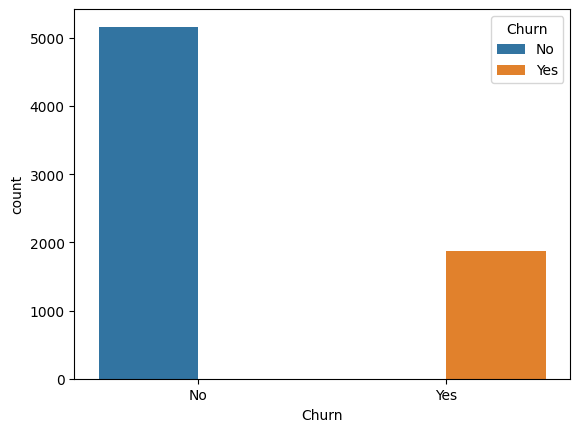

In [5]:
sns.countplot(x='Churn', data=df, hue='Churn');

In [6]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Сразу видно, что классы имеют несбалансированное распределение, однако разница между ними незначительна.

Далее исследуем распределение значений столбца TotalCharges для различных категорий Churn, используя графики Box Plot или Violin Plot

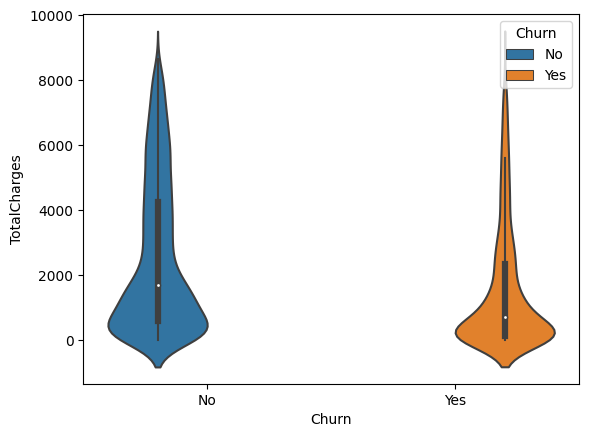

In [7]:
sns.violinplot(x='Churn', y='TotalCharges', data=df, hue='Churn');

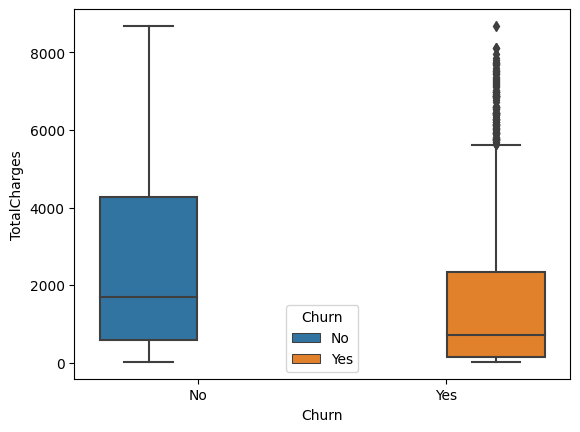

In [8]:
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn');

Здесь также заметен перекос данных и несбалансированное распределение значений, при этом значительных выбросов не наблюдается.

Построим график Box Plot, чтобы проанализировать распределение столбца TotalCharges для разных типов контрактов

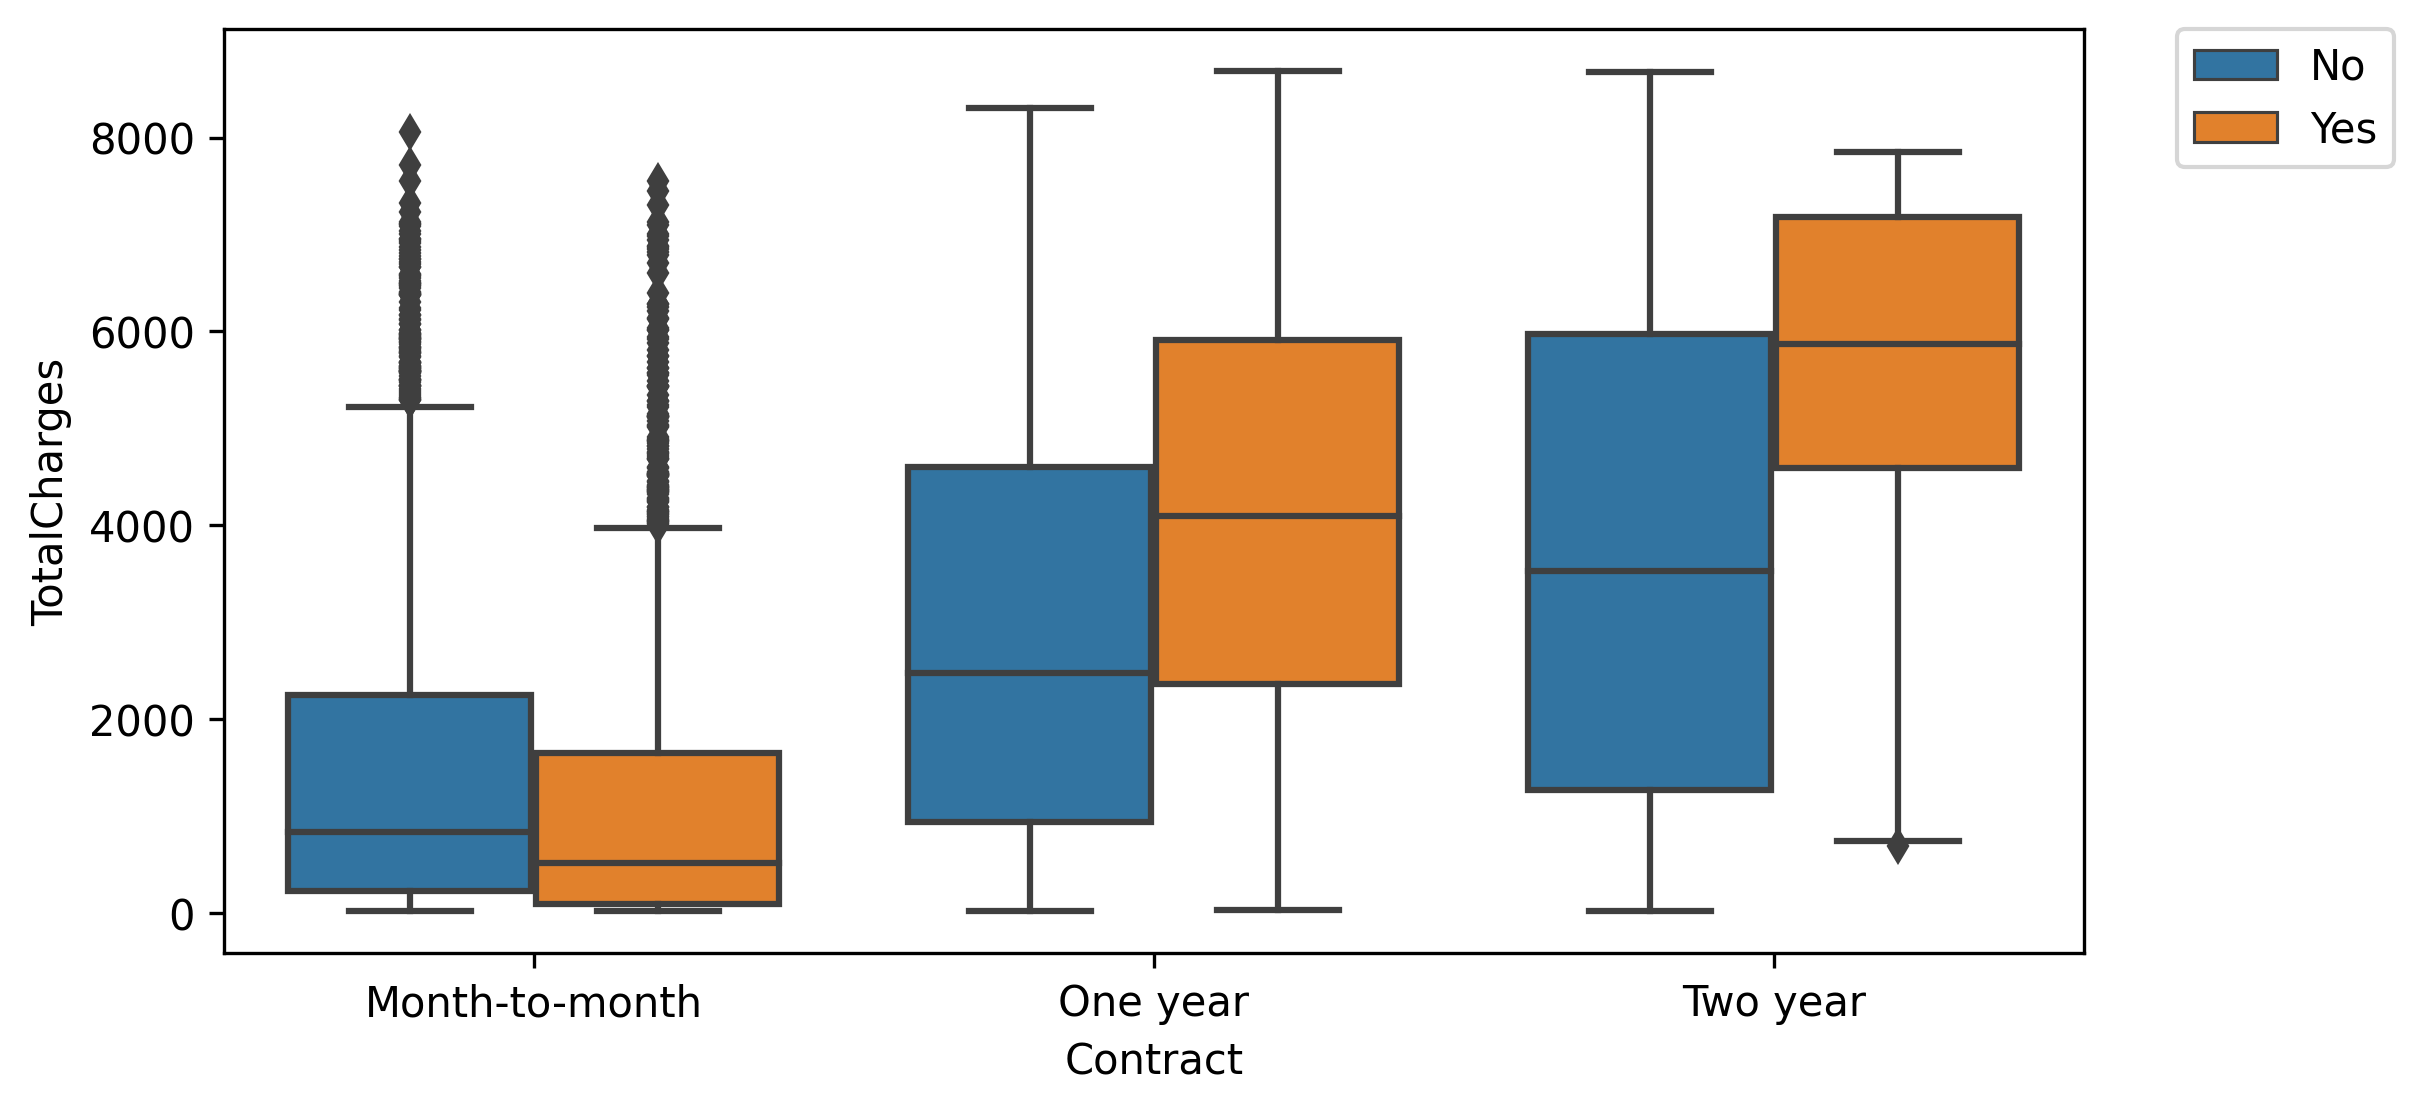

In [9]:
plt.figure(figsize=(8,4), dpi=300)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Если рассмотреть контракты типа Month-to-month, можно заметить, что уровень оттока среди них примерно одинаковый. Схожая ситуация наблюдается и для годовых контрактов. Однако для двухлетних контрактов заметно, что доля клиентов, уходящих в отток, значительно ниже.

Теперь стоит задуматься, какие меры могла бы предпринять компания Telco для снижения уровня оттока клиентов.

Анализ графиков показывает, что чем выше значение TotalCharges (общие расходы) по любому из типов контрактов, тем больше клиентов уходят в отток. Это может быть связано с тем, что клиенты находят более выгодные предложения у конкурентов или сталкиваются с недостаточным качеством обслуживания в Telco. Этот факт следует учесть при разработке стратегии.

Однако также важно обратить внимание на то, что при высоких расходах часть клиентов всё же остаётся с компанией, и это требует дополнительного анализа.

Далее построим график barplot для анализа корреляции числовых признаков с целевой переменной Churn. Для категориальных признаков предварительно преобразуем их в дамми-переменные, поскольку корреляция рассчитывается только для числовых данных

In [10]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
                             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [11]:
corr_df

SeniorCitizen  gender_Female   
SeniorCitizen                                 1.000000       0.001819  \
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes   
SeniorCitizen                              -0.001819   -0.016957     0.016957  \
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [12]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

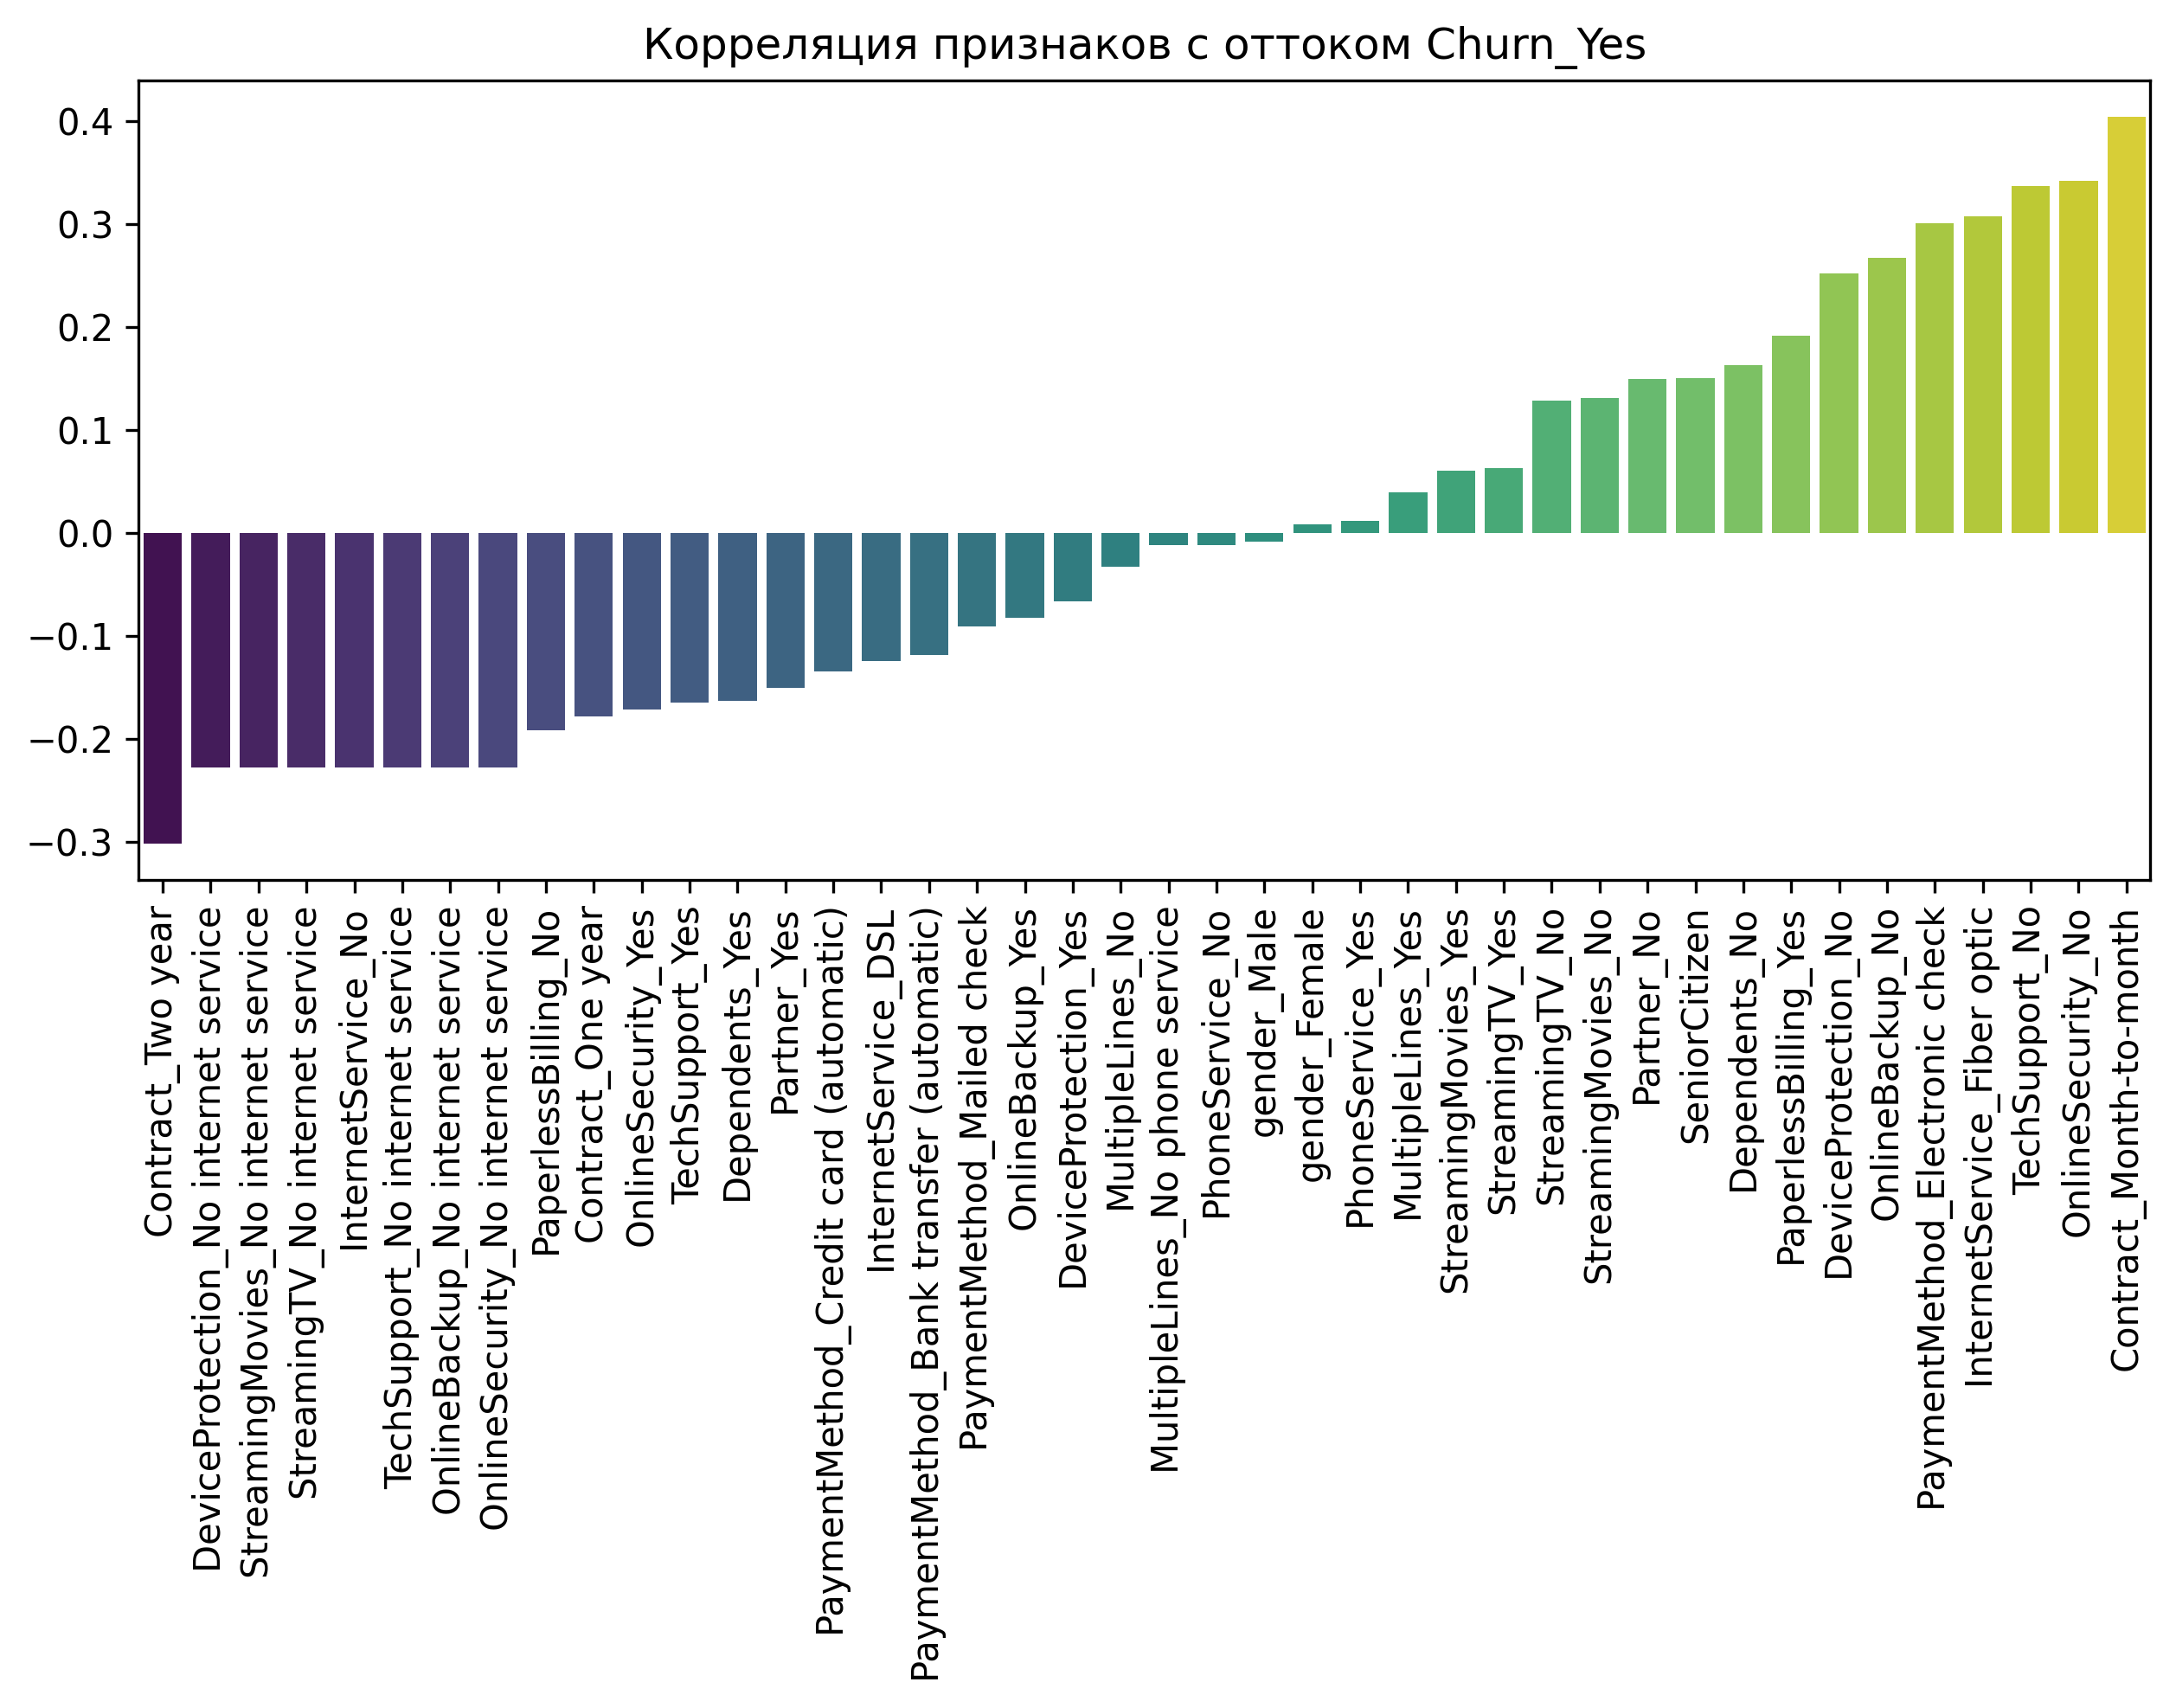

In [14]:
plt.figure(figsize=(10, 4), dpi=300)
plt.title('Корреляция признаков с оттоком Churn_Yes')
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette="viridis")
plt.xticks(rotation=90)
plt.show()

Анализ корреляции показал, что краткосрочные контракты с высокими расходами характеризуются повышенным уровнем оттока клиентов.

Теперь проведём углублённый анализ оттока и когорт. Разделим всех абонентов на сегменты в зависимости от длительности их обслуживания в компании Telco. Это позволит выявить, как изменяется поведение клиентов в зависимости от срока их сотрудничества.

Далее рассмотрим доступные типы контрактов

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [17]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [18]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Построим гистограмму для анализа распределения значений столбца tenure, который отражает количество месяцев, в течение которых человек является (или был) абонентом компании.

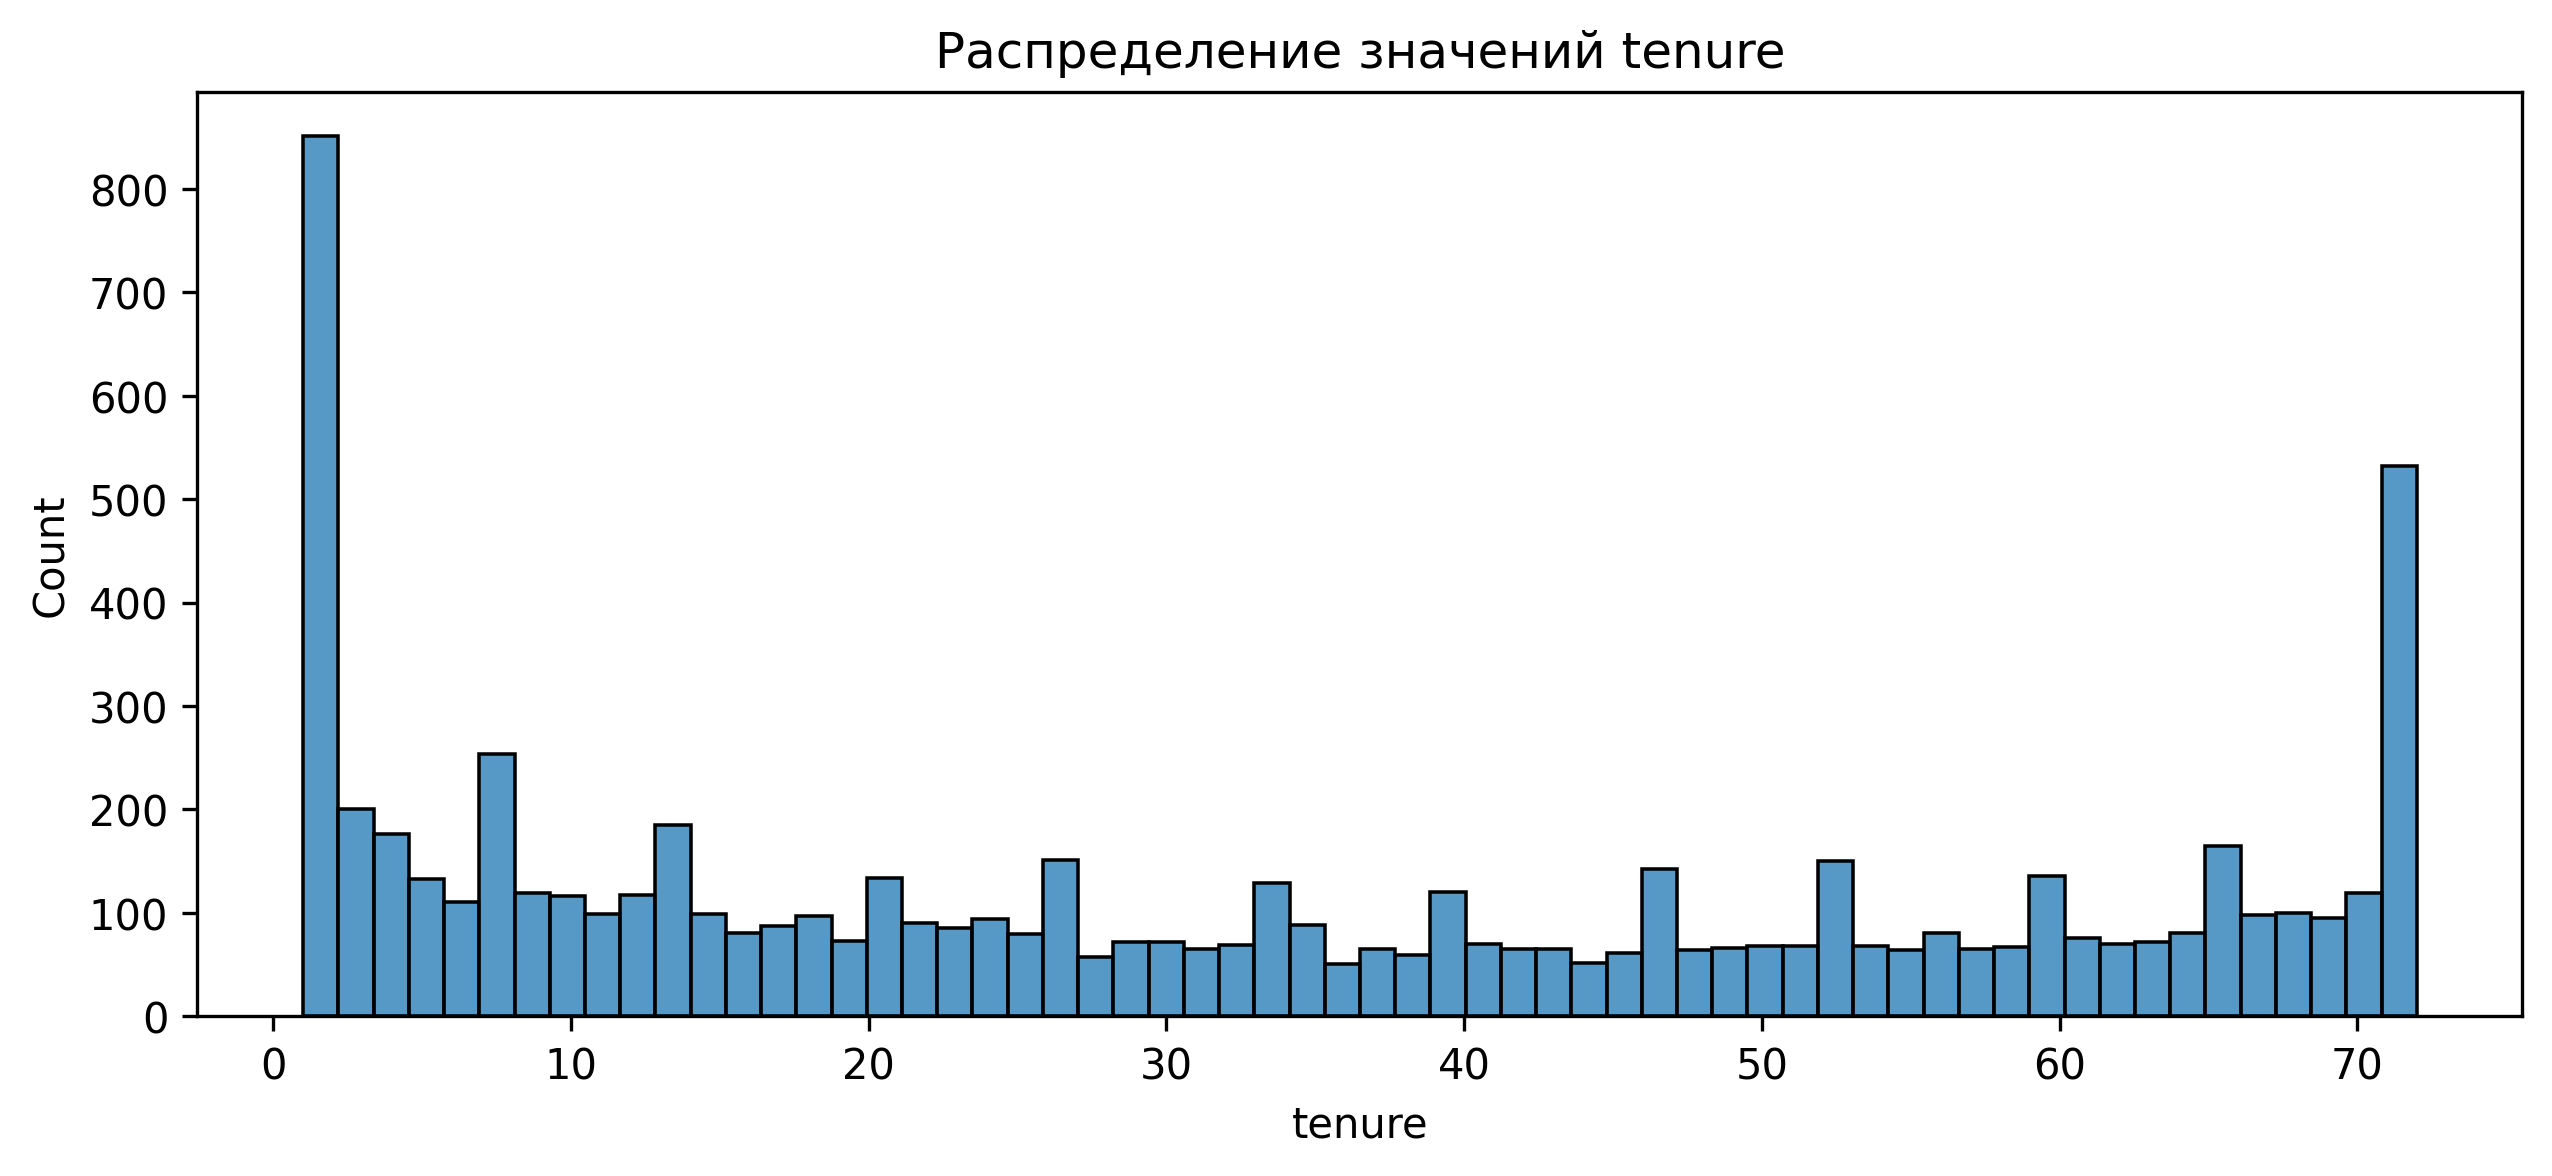

In [19]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Распределение значений tenure')
sns.histplot(data=df, x='tenure', bins=60);

Из графика видно, что значительная часть клиентов имеет tenure в диапазоне от 1 до 2 месяцев. Второй пик наблюдается около значения 72, а также заметны всплески, что, вероятно, связано с продлением годовых или двухлетних контрактов.

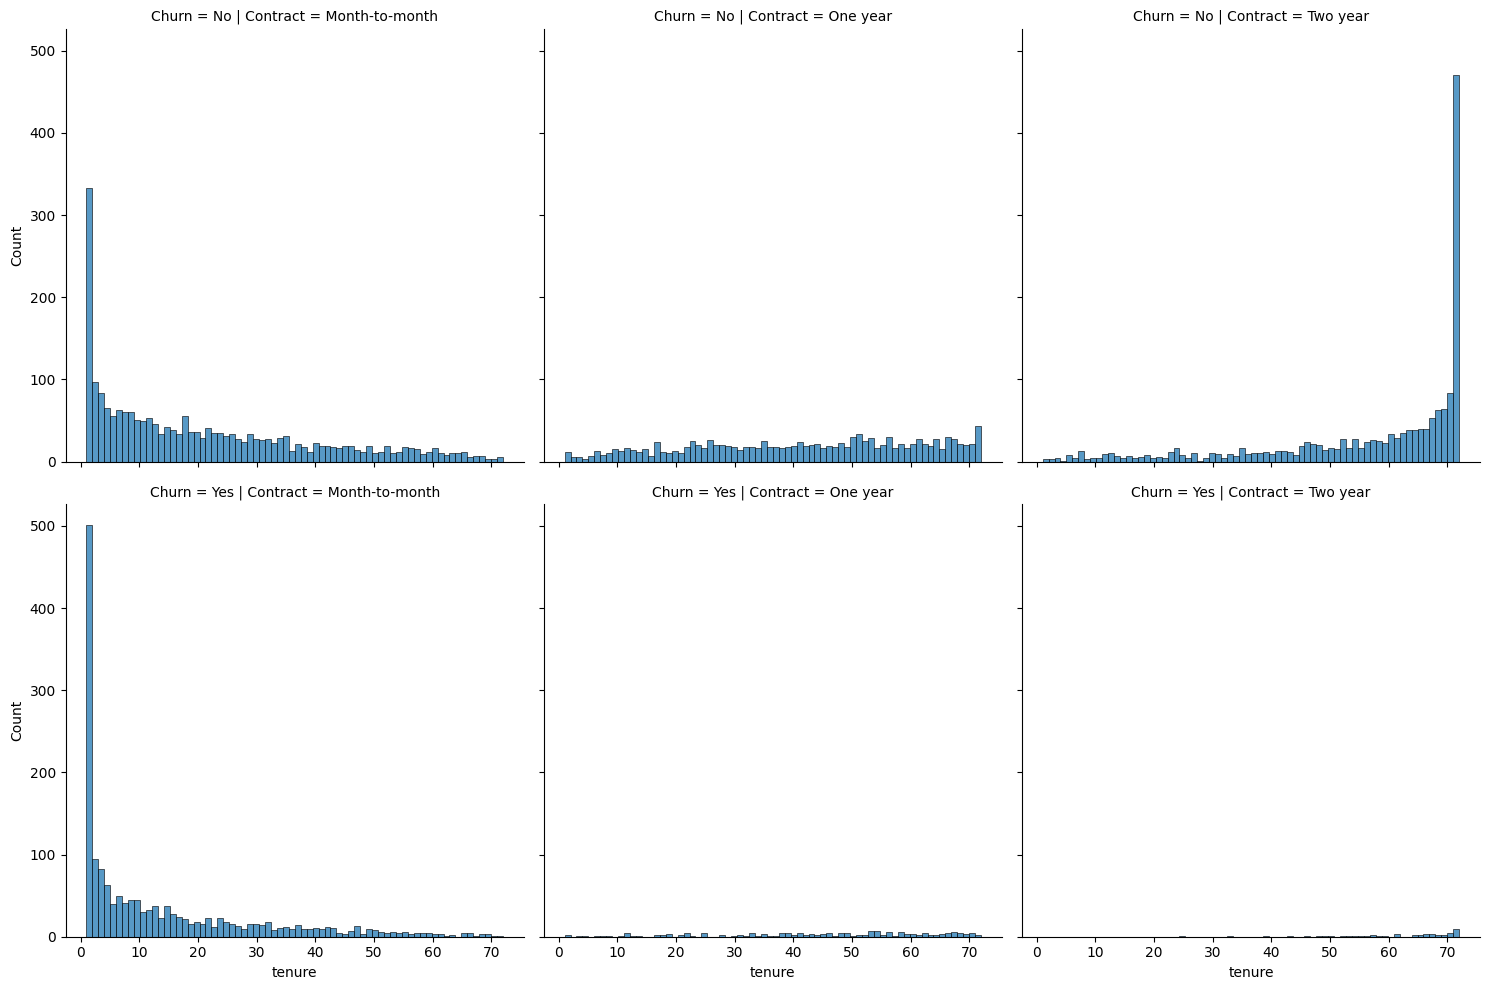

In [20]:
#plt.title('Распределение значений tenure')
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')
plt.show();

Согласно графику displot, отток клиентов на годовых и двухлетних контрактах минимален, поэтому основные усилия стоит сосредоточить на работе с контрактами типа 'Month-to-month'. Для краткосрочных контрактов (менее года) пик оттока наблюдается в интервале от 1 до 2 месяцев, после чего распределение становится более пологим.

Ранее мы отмечали, что высокий отток на долгосрочных контрактах может быть связан с большими расходами. В случае с контрактами 'Month-to-month' причиной оттока могут быть более высокие тарифы по сравнению с долгосрочными контрактами.

Компании Telco стоит рассмотреть возможность проведения активной маркетинговой кампании, предлагая клиентам с контрактами 'Month-to-month' перейти на годовые или двухлетние контракты. Это может временно снизить доход с одного клиента, но в долгосрочной перспективе обеспечить больший совокупный доход.

Далее построим scatterplot, чтобы визуализировать взаимосвязь между столбцами Total Charges и Monthly Charges, с раскраской точек по столбцу Churn.

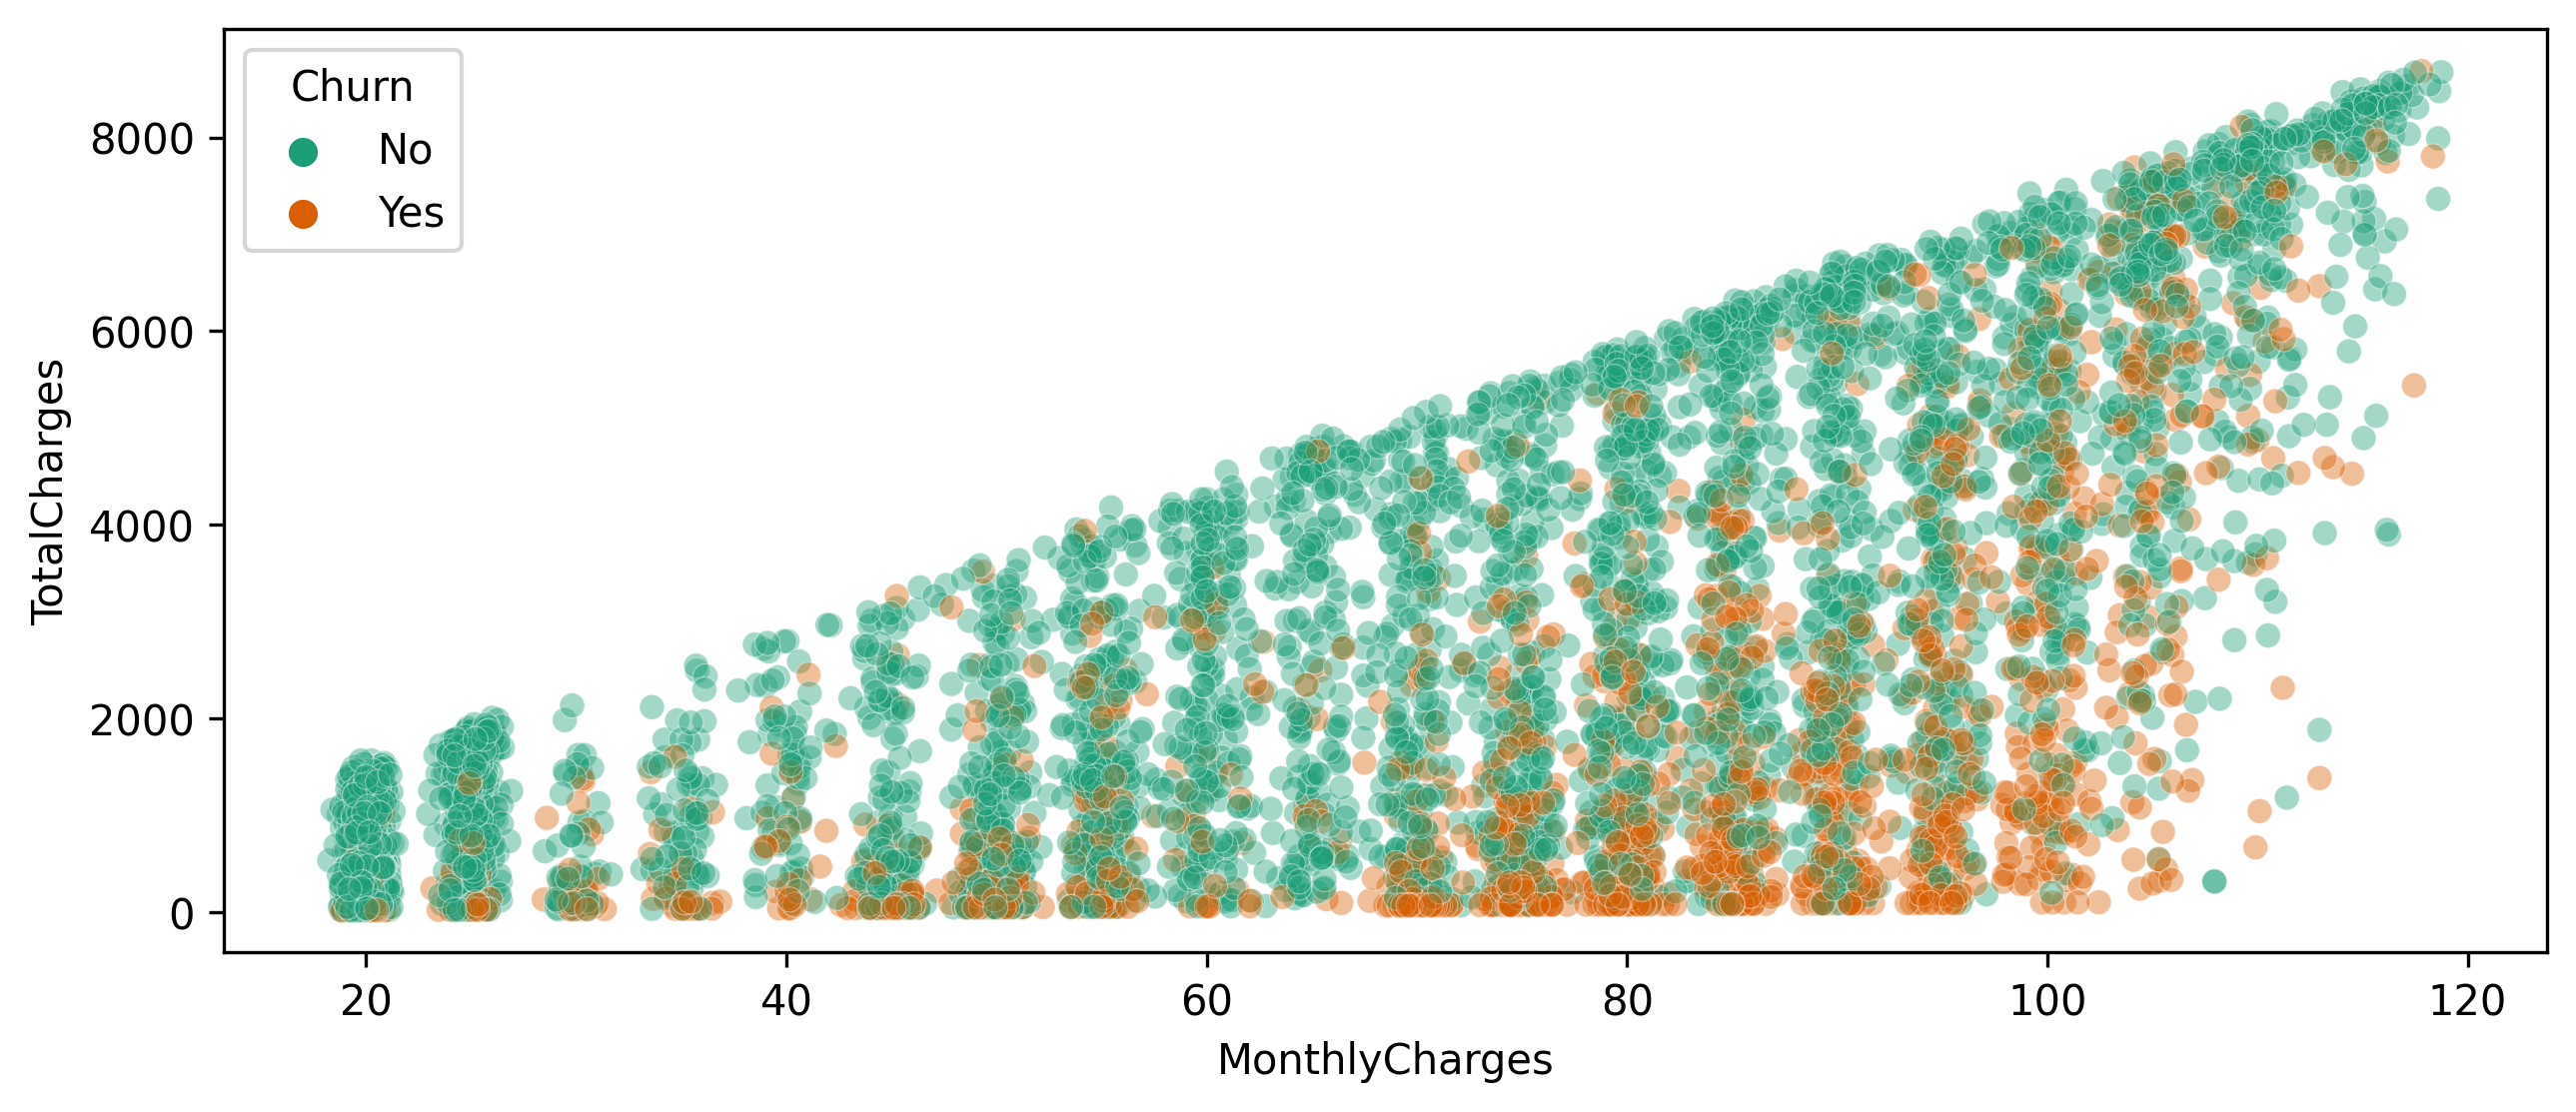

In [21]:
plt.figure(figsize=(10,4), dpi=300)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, linewidth=0.3, palette='Dark2');

Очередной раз подтверждается, что в отток чаще уходят клиенты с высокими расходами. Это логично: чем больше ежемесячные платежи, тем больше у клиентов причин искать более выгодные тарифы у конкурентов.

В то же время возникает дискуссионный вопрос: что для компании важнее — клиент с высокими ежемесячными платежами (MonthlyCharges) или клиент с высокими общими платежами (TotalCharges)? Эти два показателя взаимосвязаны через длительность обслуживания (tenure).

Анализ scatterplot подтверждает, что клиенты с высокими ежемесячными расходами чаще уходят в отток, причём их значения TotalCharges обычно невелики.

Создание когорт (сегментов) по столбцу tenure
Для анализа создадим когорты, разделив клиентов на группы по длительности обслуживания (от 1 месяца до 72 месяцев). Для каждой когорты вычислим процент оттока (churn rate) — долю клиентов, ушедших в отток, относительно общего числа в данной группе.

Такой подход позволит отследить закономерность: с увеличением значения tenure уровень оттока должен снижаться. Это вполне логично, поскольку чем дольше клиент пользуется услугами компании, тем выше вероятность, что его всё устраивает, и он продолжит оставаться с компанией.

In [22]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [23]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [24]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate

tenure                   1          2     3          4          5          6    
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636  \
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10  ...        63   
customerID        38.931298  34.146341  38.655462  38.793103  ...  5.555556  \
gender            38.931298  34.146341  38.655462  38.793103  ...  5.555556   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Partner           38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Dependents        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PhoneService      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MultipleLines     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
InternetService   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TechSupport       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingTV       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Contract          38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TotalCharges      38.931298  34.146341  38.655462  38.793103  ...  5.555556   

tenure             64         65         66         67   68        69   
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053  \
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14.606742  10.204082  9.0  8.42105

In [25]:
churn_rate.transpose()

customerID     gender  SeniorCitizen    Partner  Dependents   
tenure                                                                
1        61.990212  61.990212      61.990212  61.990212   61.990212  \
2        51.680672  51.680672      51.680672  51.680672   51.680672   
3        47.000000  47.000000      47.000000  47.000000   47.000000   
4        47.159091  47.159091      47.159091  47.159091   47.159091   
5        48.120301  48.120301      48.120301  48.120301   48.120301   
...            ...        ...            ...        ...         ...   
68        9.000000   9.000000       9.000000   9.000000    9.000000   
69        8.421053   8.421053       8.421053   8.421053    8.421053   
70        9.243697   9.243697       9.243697   9.243697    9.243697   
71        3.529412   3.529412       3.529412   3.529412    3.529412   
72        1.657459   1.657459       1.657459   1.657459    1.657459   

        PhoneService  MultipleLines  InternetService  OnlineSecurity   
tenure                                                                 
1          61.990212      61.990212        61.990212       61.990212  \
2          51.680672      51.680672        51.680672       51.680672   
3          47.000000      47.000000        47.000000       47.000000   
4          47.159091      47.159091        47.159091       47.159091   
5          48.120301      48.120301        48.120301       48.120301   
...              ...            ...              ...             ...   
68          9.000000       9.000000         9.000000        9.000000   
69          8.421053       8.421053         8.421053        8.421053   
70          9.243697       9.243697         9.243697        9.243697   
71          3.529412       3.529412         3.529412        3.529412   
72          1.657459       1.657459         1.657459        1.657459   

        OnlineBackup  DeviceProtection  TechSupport  StreamingTV   
tenure                                                             
1          61.990212         61.990212    61.990212    61.990212  \
2          51.680672         51.680672    51.680672    51.680672   
3          47.000000         47.000000    47.000000    47.000000   
4          47.159091         47.159091    47.159091    47.159091   
5          48.120301         48.120301    48.120301    48.120301   
...              ...               ...          ...          ...   
68          9.000000          9.000000     9.000000     9.000000   
69          8.421053          8.421053     8.421053     8.421053   
70          9.243697          9.243697     9.243697     9.243697   
71          3.529412          3.529412     3.529412     3.529412   
72          1.657459          1.657459     1.657459     1.657459   

        StreamingMovies   Contract  PaperlessBilling  PaymentMethod   
tenure                                                                
1             61.990212  61.990212         61.990212      61.990212  \
2             51.680672  51.680672         51.680672      51.680672   
3             47.000000  47.000000         47.000000      47.000000   
4             47.159091  47.159091         47.159091      47.159091   
5             48.120301  48.120301         48.120301      48.120301   
...                 ...        ...               ...            ...   
68             9.000000   9.000000          9.000000       9.000000   
69             8.421053   8.421053          8.421053       8.421053   
70             9.243697   9.243697          9.243697       9.243697   
71             3.529412   3.529412          3.529412       3.529412   
72             1.657459   1.657459          1.657459       1.657459   

        MonthlyCharges  TotalCharges  
tenure                                
1            61.990212     61.990212  
2            51.680672     51.680672  
3            47.000000     47.000000  
4            47.159091     47.159091  
5            48.120301     48.120301  
...                ...           ...  
68            9.000000    

In [26]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

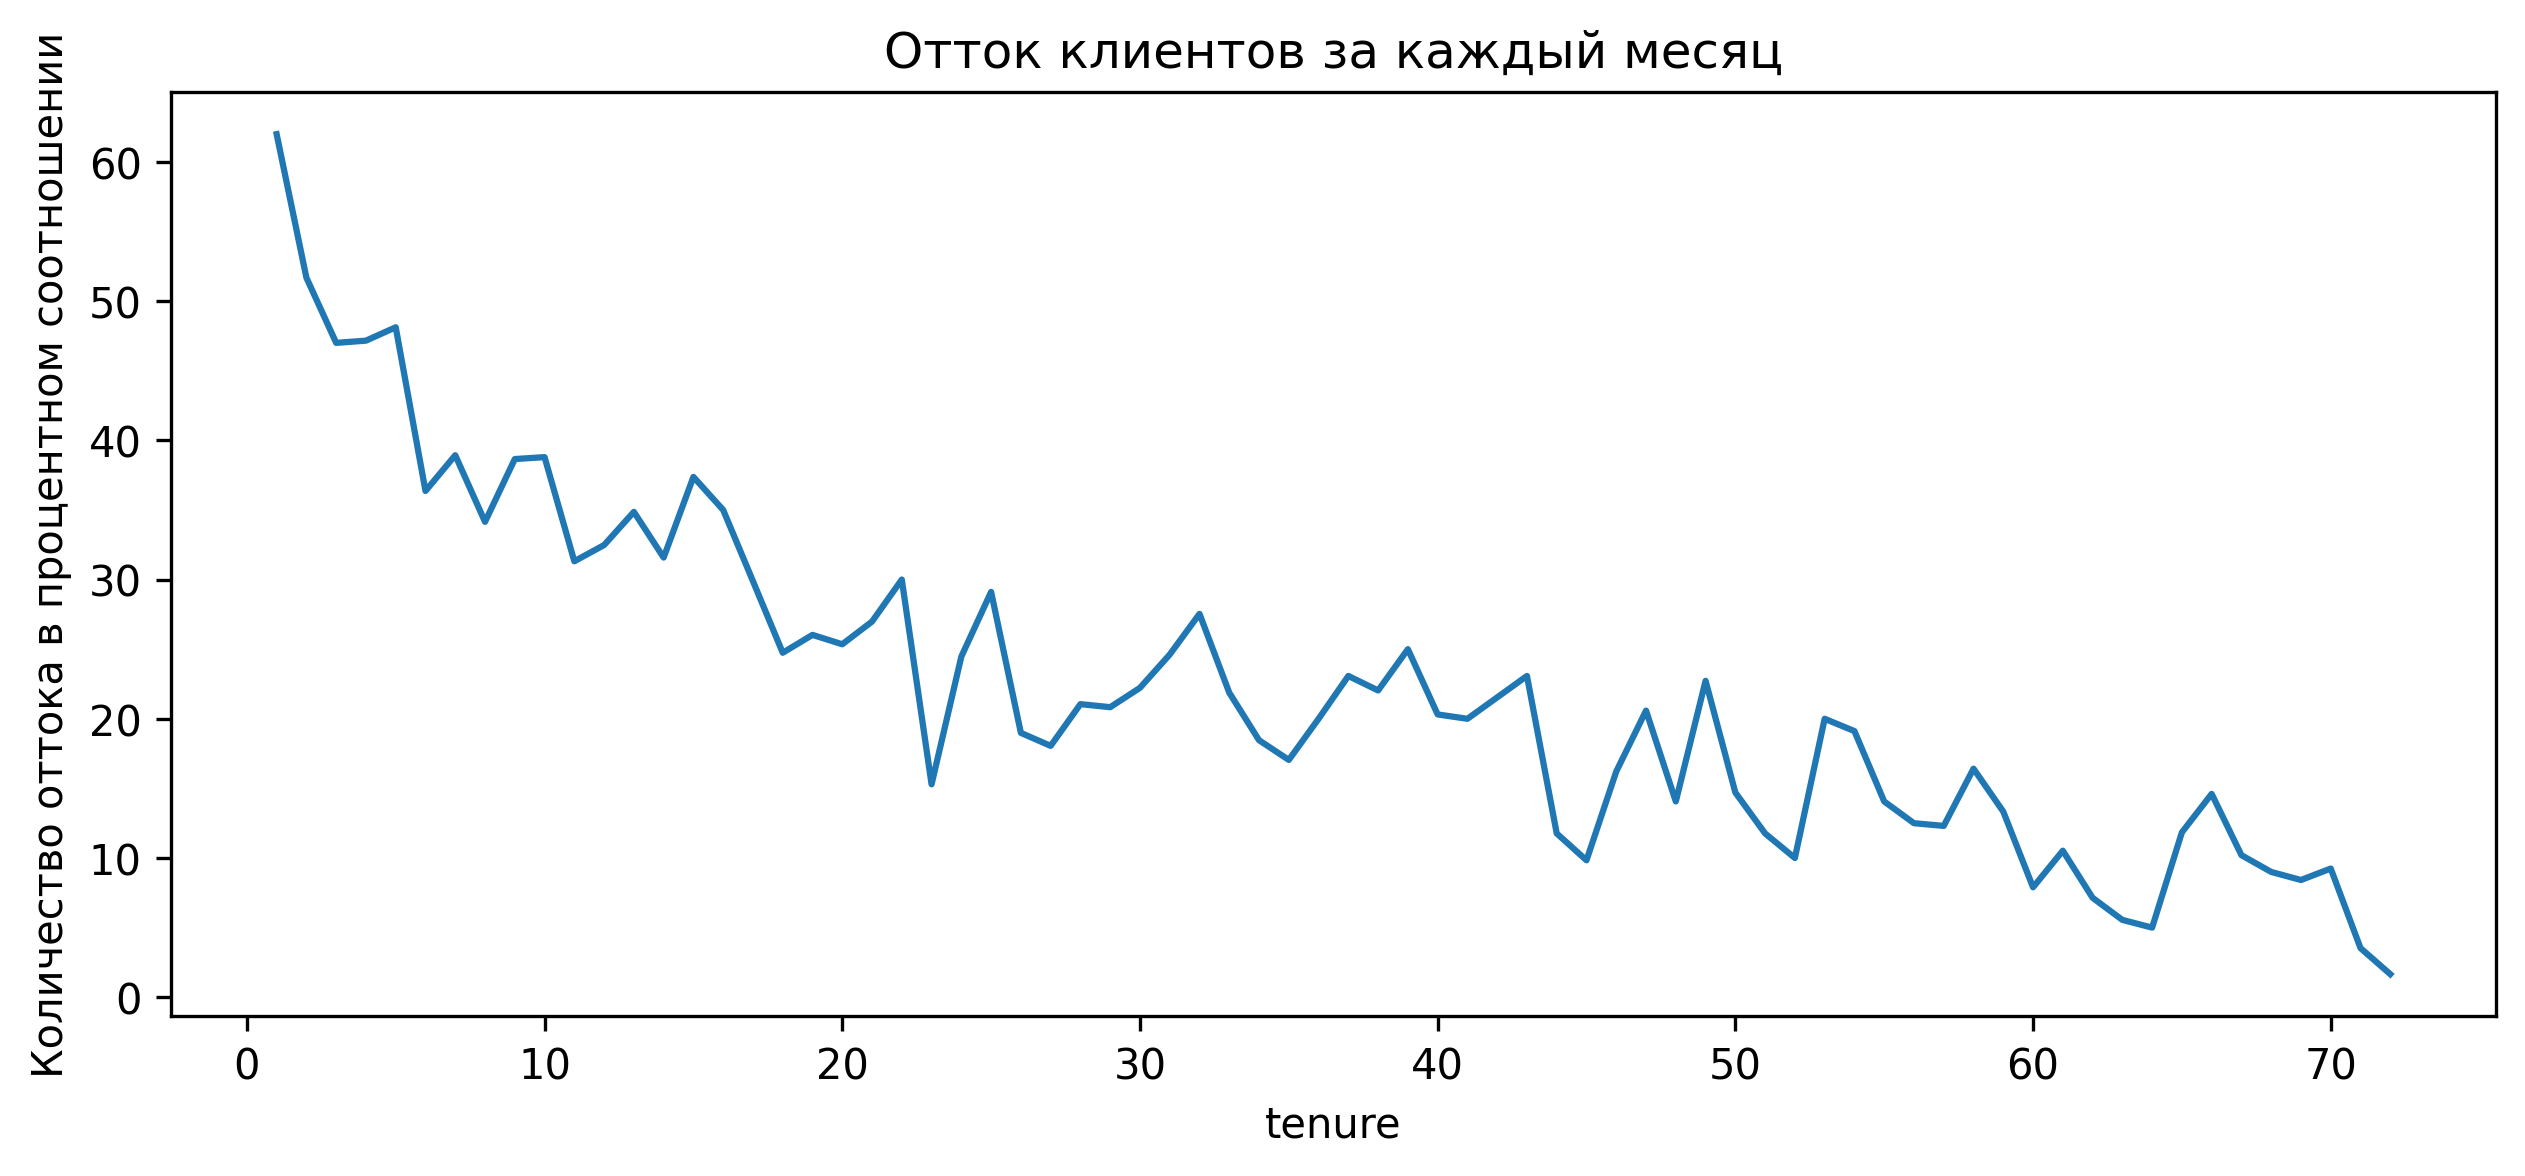

In [27]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Отток клиентов за каждый месяц')
plt.xlabel('Количество месяцев')
plt.ylabel('Количество оттока в процентном соотношении')
churn_rate.transpose()['customerID'].plot();

Видно, что на графике пологое распределение. Чем больше значение tenure, тем меньше процент оттока в когорте
Оптимизируем процесс исследования. На основе колонки tenure создадим колонку с названием 'Tenure Cohort', в которой будут следующие 4 категории:
- 0-12 месяцев
- 12-24 месяца
- 24-48 месяцев
- Более 48 месяцев

In [28]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 месяцев'
    elif tenure < 25:
        return '12-24 месяцев'
    elif tenure < 49:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'

In [29]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [30]:
df[['Tenure Cohort', 'tenure']]

Tenure Cohort  tenure
0         0-12 месяцев       1
1        24-48 месяцев      34
2         0-12 месяцев       2
3        24-48 месяцев      45
4         0-12 месяцев       2
...                ...     ...
7027     12-24 месяцев      24
7028  Более 48 месяцев      72
7029      0-12 месяцев      11
7030      0-12 месяцев       4
7031  Более 48 месяцев      66

[7032 rows x 2 columns]

Построим scatterplot для визуализации зависимости между Total Charges и Monthly Charges, раскрасив точки разными цветами в соответствии с ранее созданными когортами из столбца Tenure Cohort

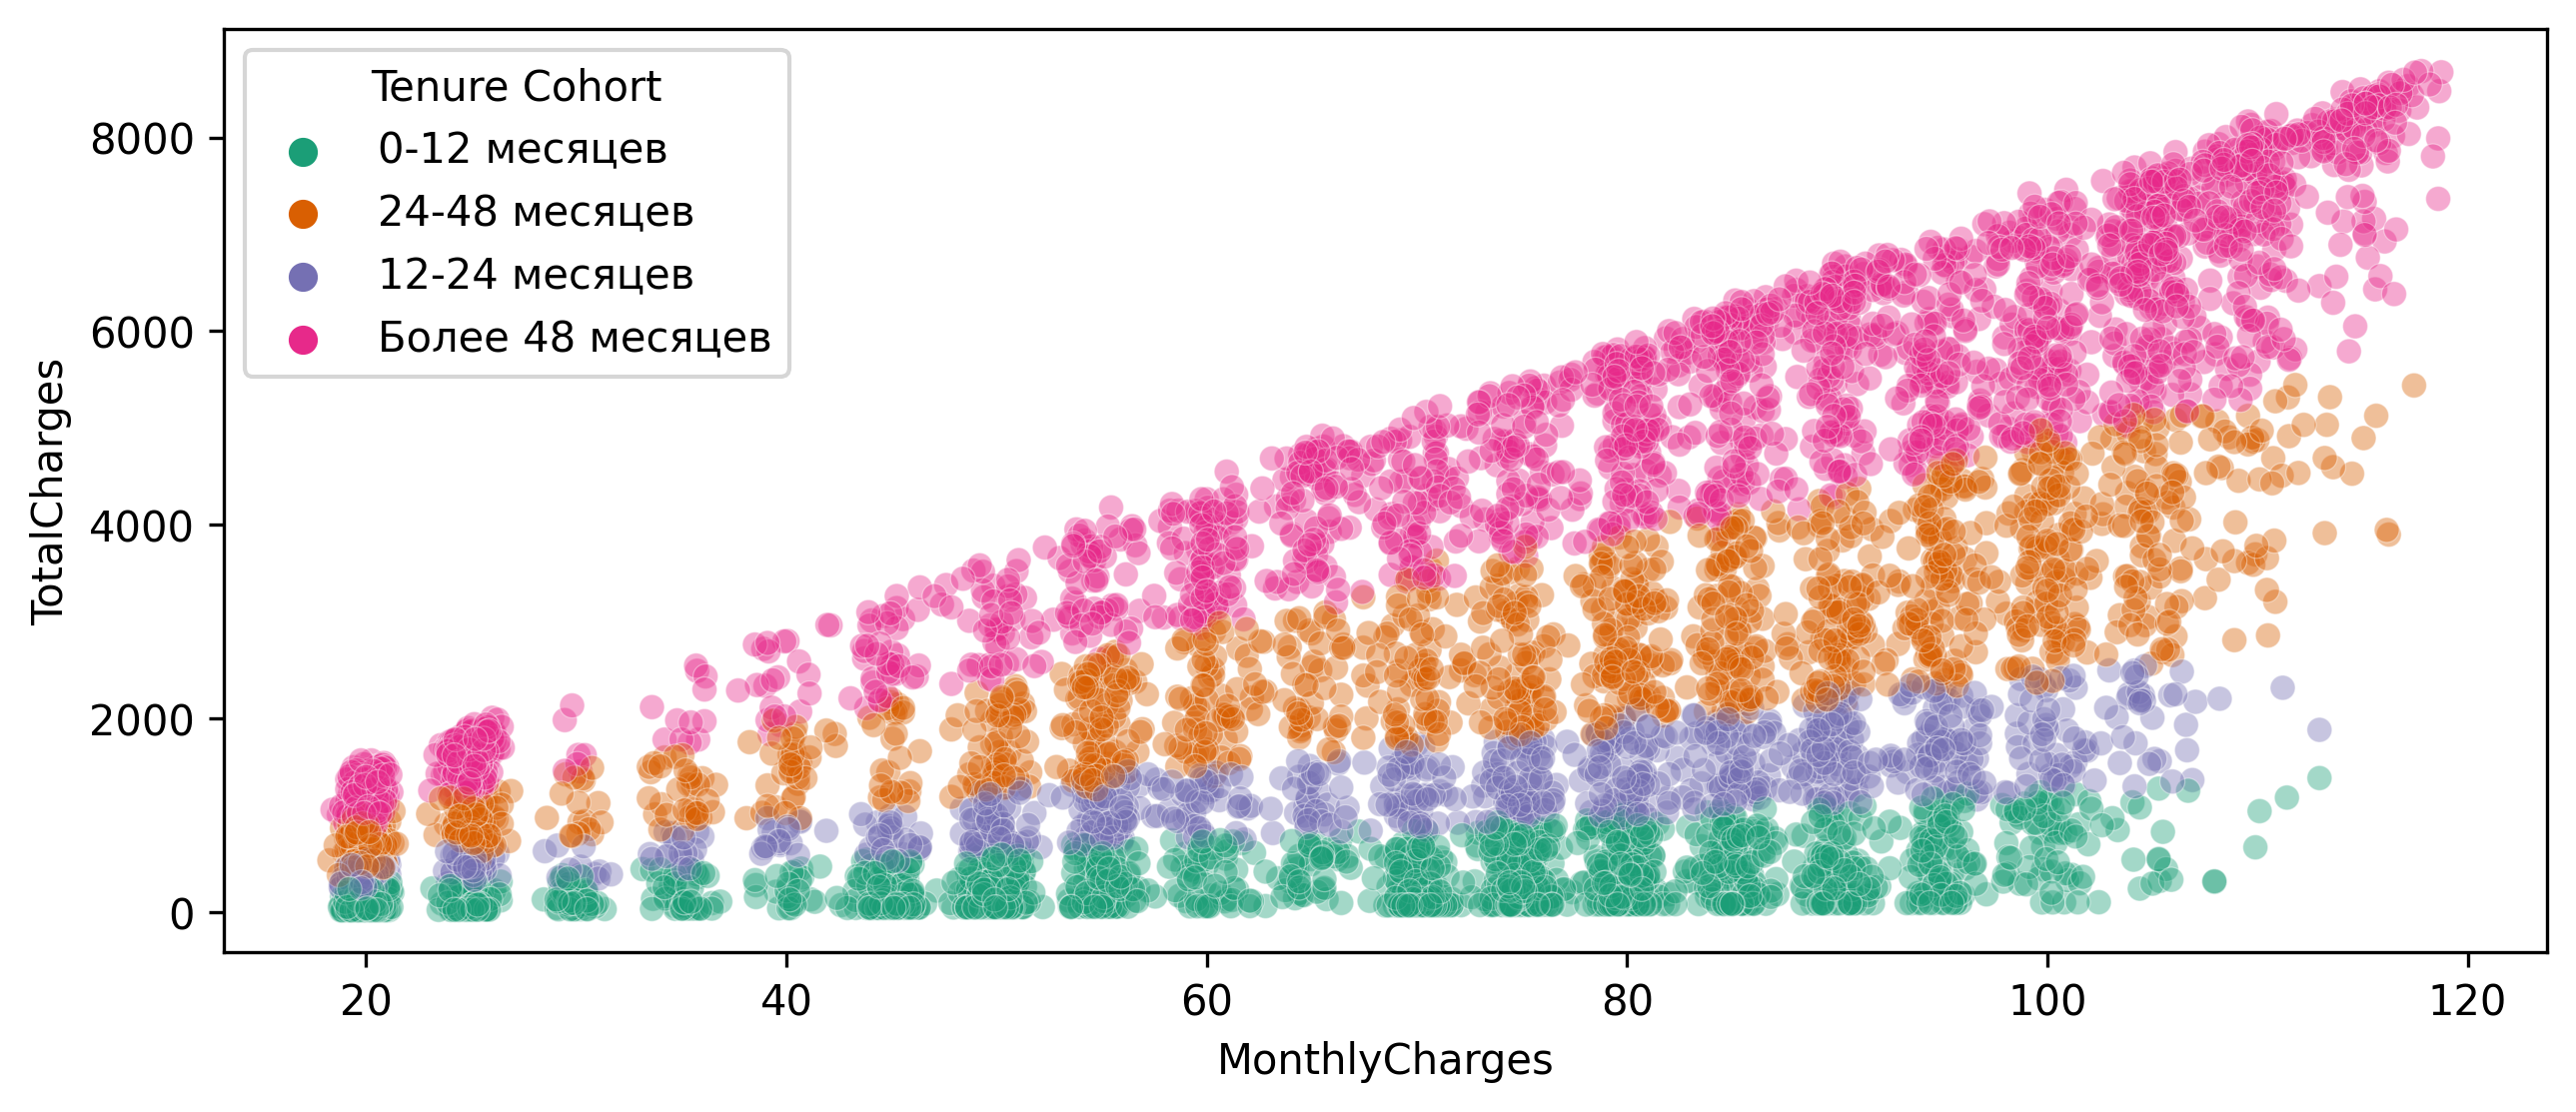

In [31]:
plt.figure(figsize=(10,4), dpi=300)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4, linewidth=0.3, palette='Dark2');

График выглядит логично: с увеличением когорт возрастает и значение TotalCharges. Это делает график более читаемым и удобным для анализа.

Теперь построим график countplot, чтобы показать количество клиентов, ушедших и не ушедших в отток, в каждой когорте.

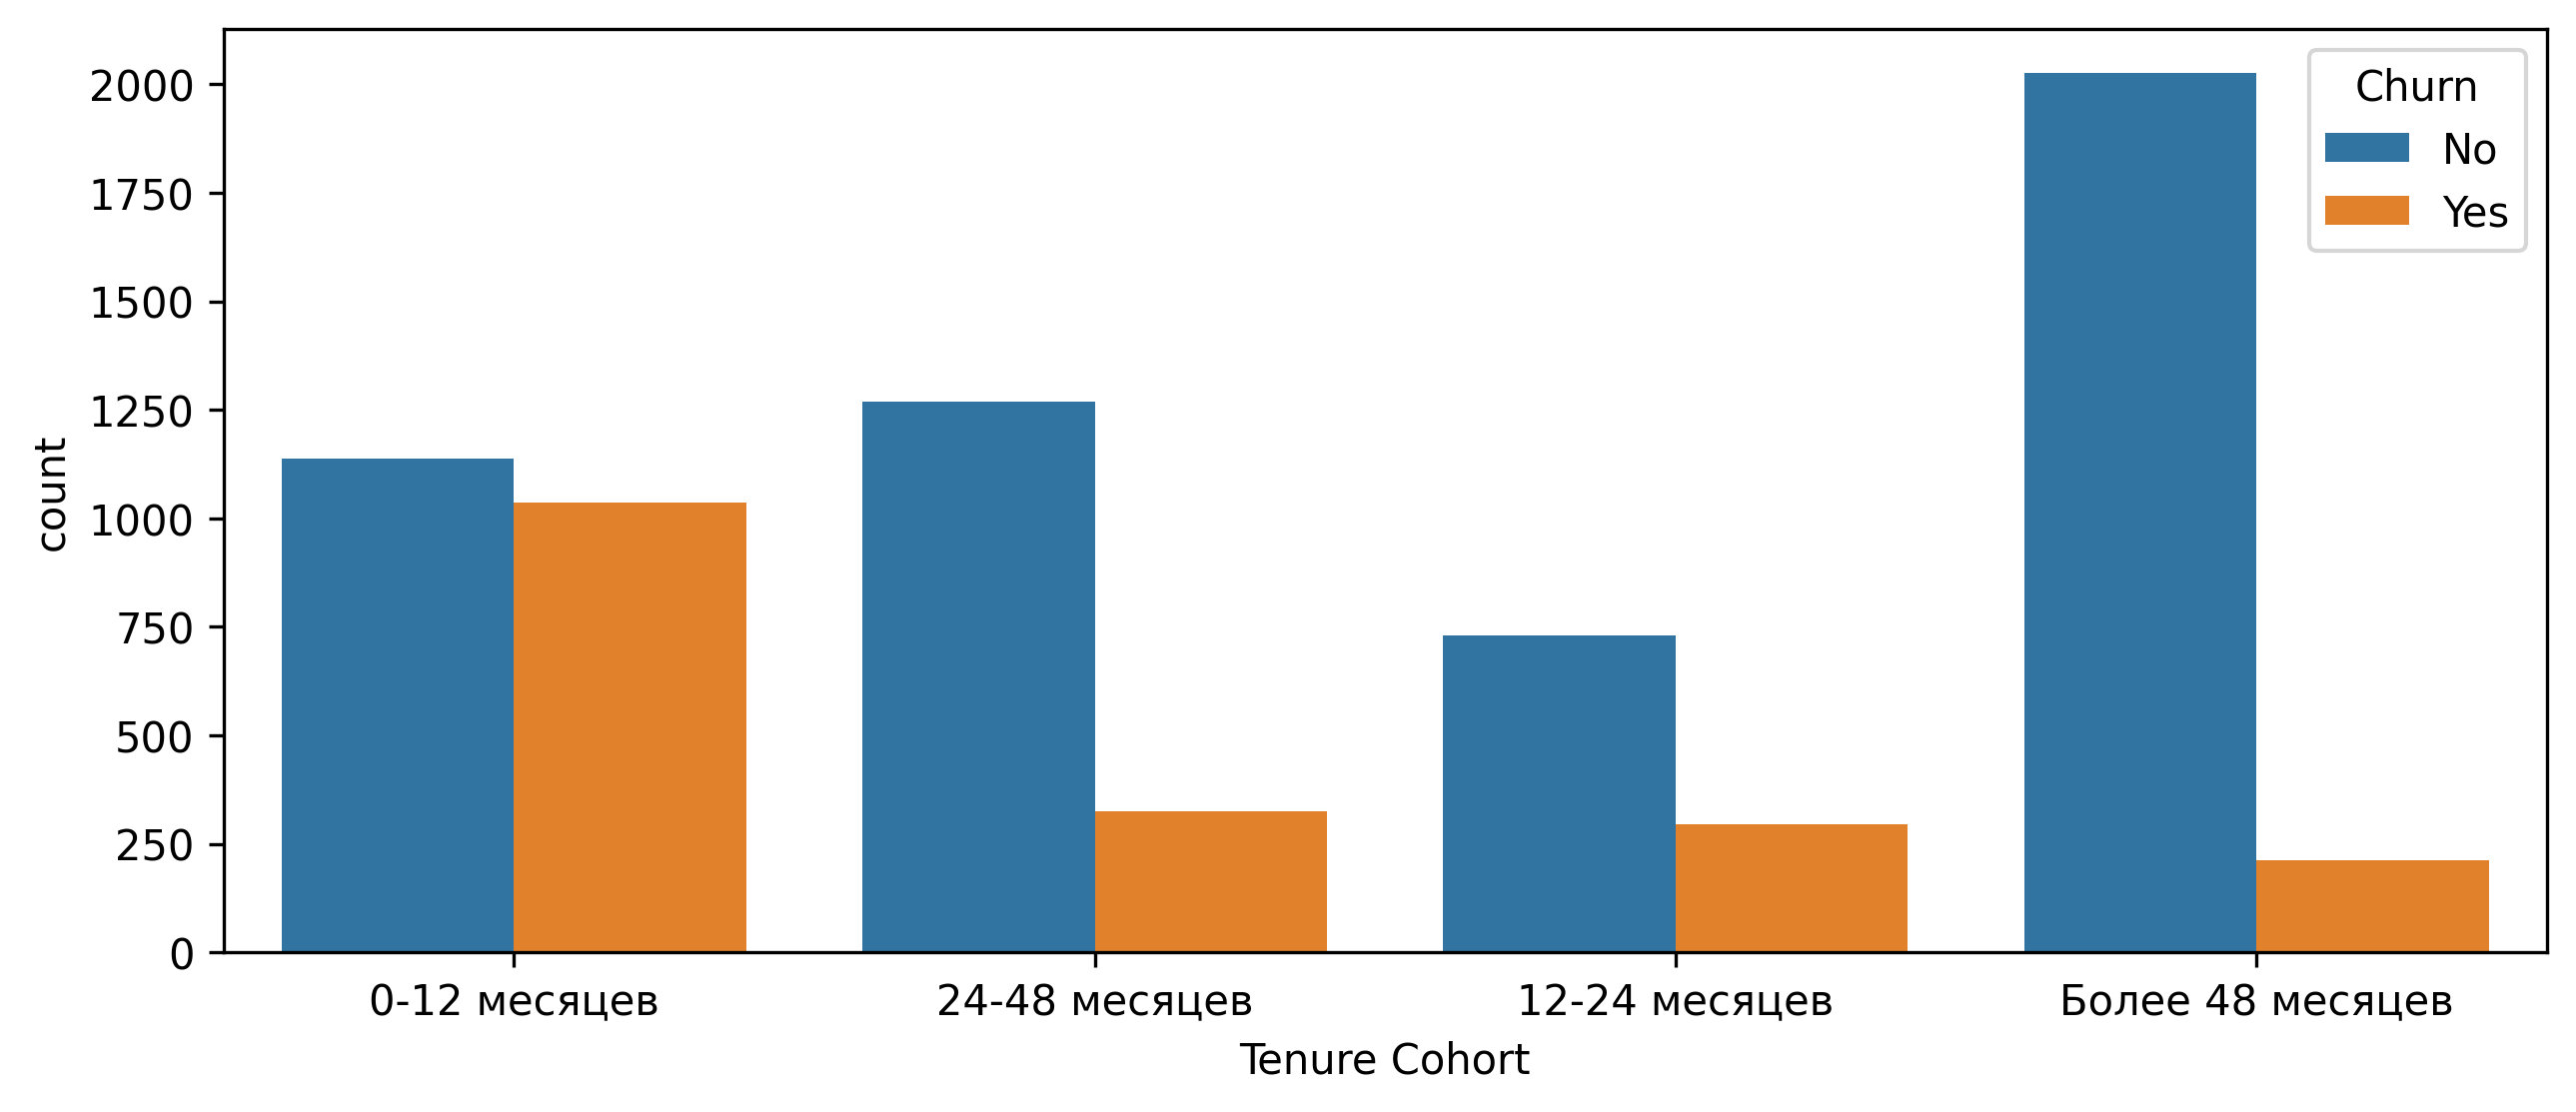

In [32]:
plt.figure(figsize=(10,4), dpi=300)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

На графике чётко видно, что клиенты с длительностью обслуживания более 48 месяцев менее подвержены оттоку, в то время как для пользователей с менее чем 12 месяцами вероятность оттока значительно возрастает.

Теперь создадим набор графиков CountPlot, чтобы отобразить количество клиентов в разных когортах Tenure Cohort. Для каждого типа контракта построим отдельный график и раскрасим его по колонке Churn.

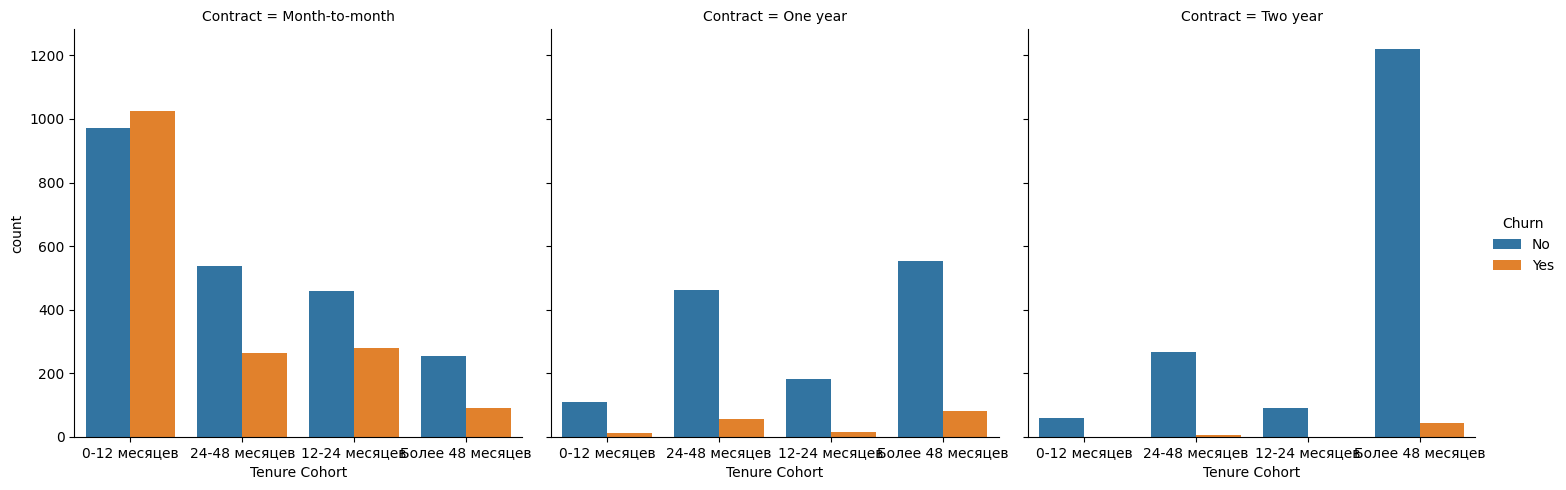

In [33]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract');

Предыдущий график, как и другие, подтверждает, что клиенты с годичными и двухлетними контрактами реже уходят в отток, независимо от длительности пользования услугами.

Переходим к созданию предсказательной модели
В нашем исследовании мы будем использовать модели машинного обучения с учителем. Рассмотрим 4 модели на основе деревьев: дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг, и сравним их результаты.

Одно дерево решений (Decision Tree)
Для начала разделим все данные на признаки X и целевую переменную Y. Затем создадим дамми-переменные там, где это необходимо, и проверим, есть ли признаки, которые можно удалить.

In [34]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
y = df['Churn']

Выполним разбиение данных на обучающий и тестовый наборы(train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.

In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Построим модель Decision Tree, оценим её работу и выполним её обучение

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(max_depth=6)

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
preds = dt.predict(X_test)

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



Из данных видно, что модель работает лучше для класса "Churn['No']", чем для "Churn['Yes']". Это логично, поскольку класс "Churn['No']" содержит больше данных.

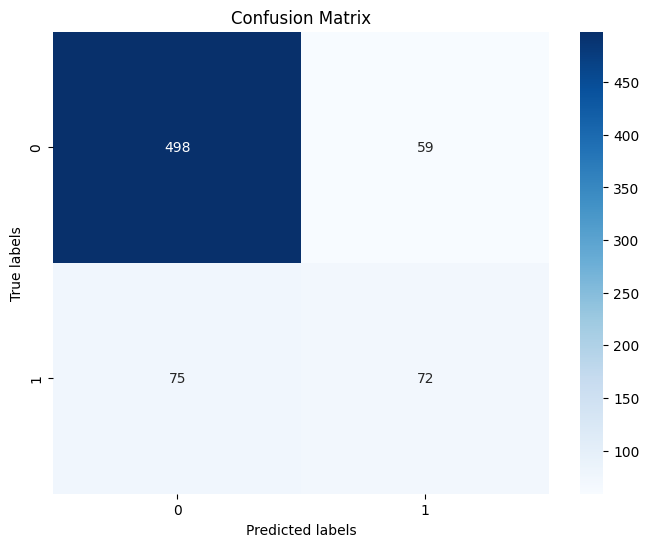

In [45]:
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Мы наблюдаем, что 75 абонентов были неправильно классифицированы, когда модель предсказала отсутствие оттока, хотя он всё-таки произошёл. Это число важно минимизировать, поскольку оно отражает упущенные случаи ухода клиентов. Также есть ещё 60 клиентов, для которых модель предсказала отток, но на самом деле они остались

In [46]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Важность'])

In [47]:
imp_feats = imp_feats.sort_values('Важность')

In [48]:
imp_feats = imp_feats[imp_feats['Важность'] > 0]
imp_feats

Важность
gender_Male                         0.001237
OnlineBackup_Yes                    0.005341
PhoneService_Yes                    0.007852
TechSupport_Yes                     0.007868
OnlineSecurity_Yes                  0.008376
Contract_One year                   0.010021
SeniorCitizen                       0.010825
MultipleLines_Yes                   0.012432
OnlineSecurity_No internet service  0.026290
Contract_Two year                   0.027065
PaymentMethod_Electronic check      0.034436
MonthlyCharges                      0.044148
TotalCharges                        0.066135
InternetService_Fiber optic         0.314060
tenure                              0.423914

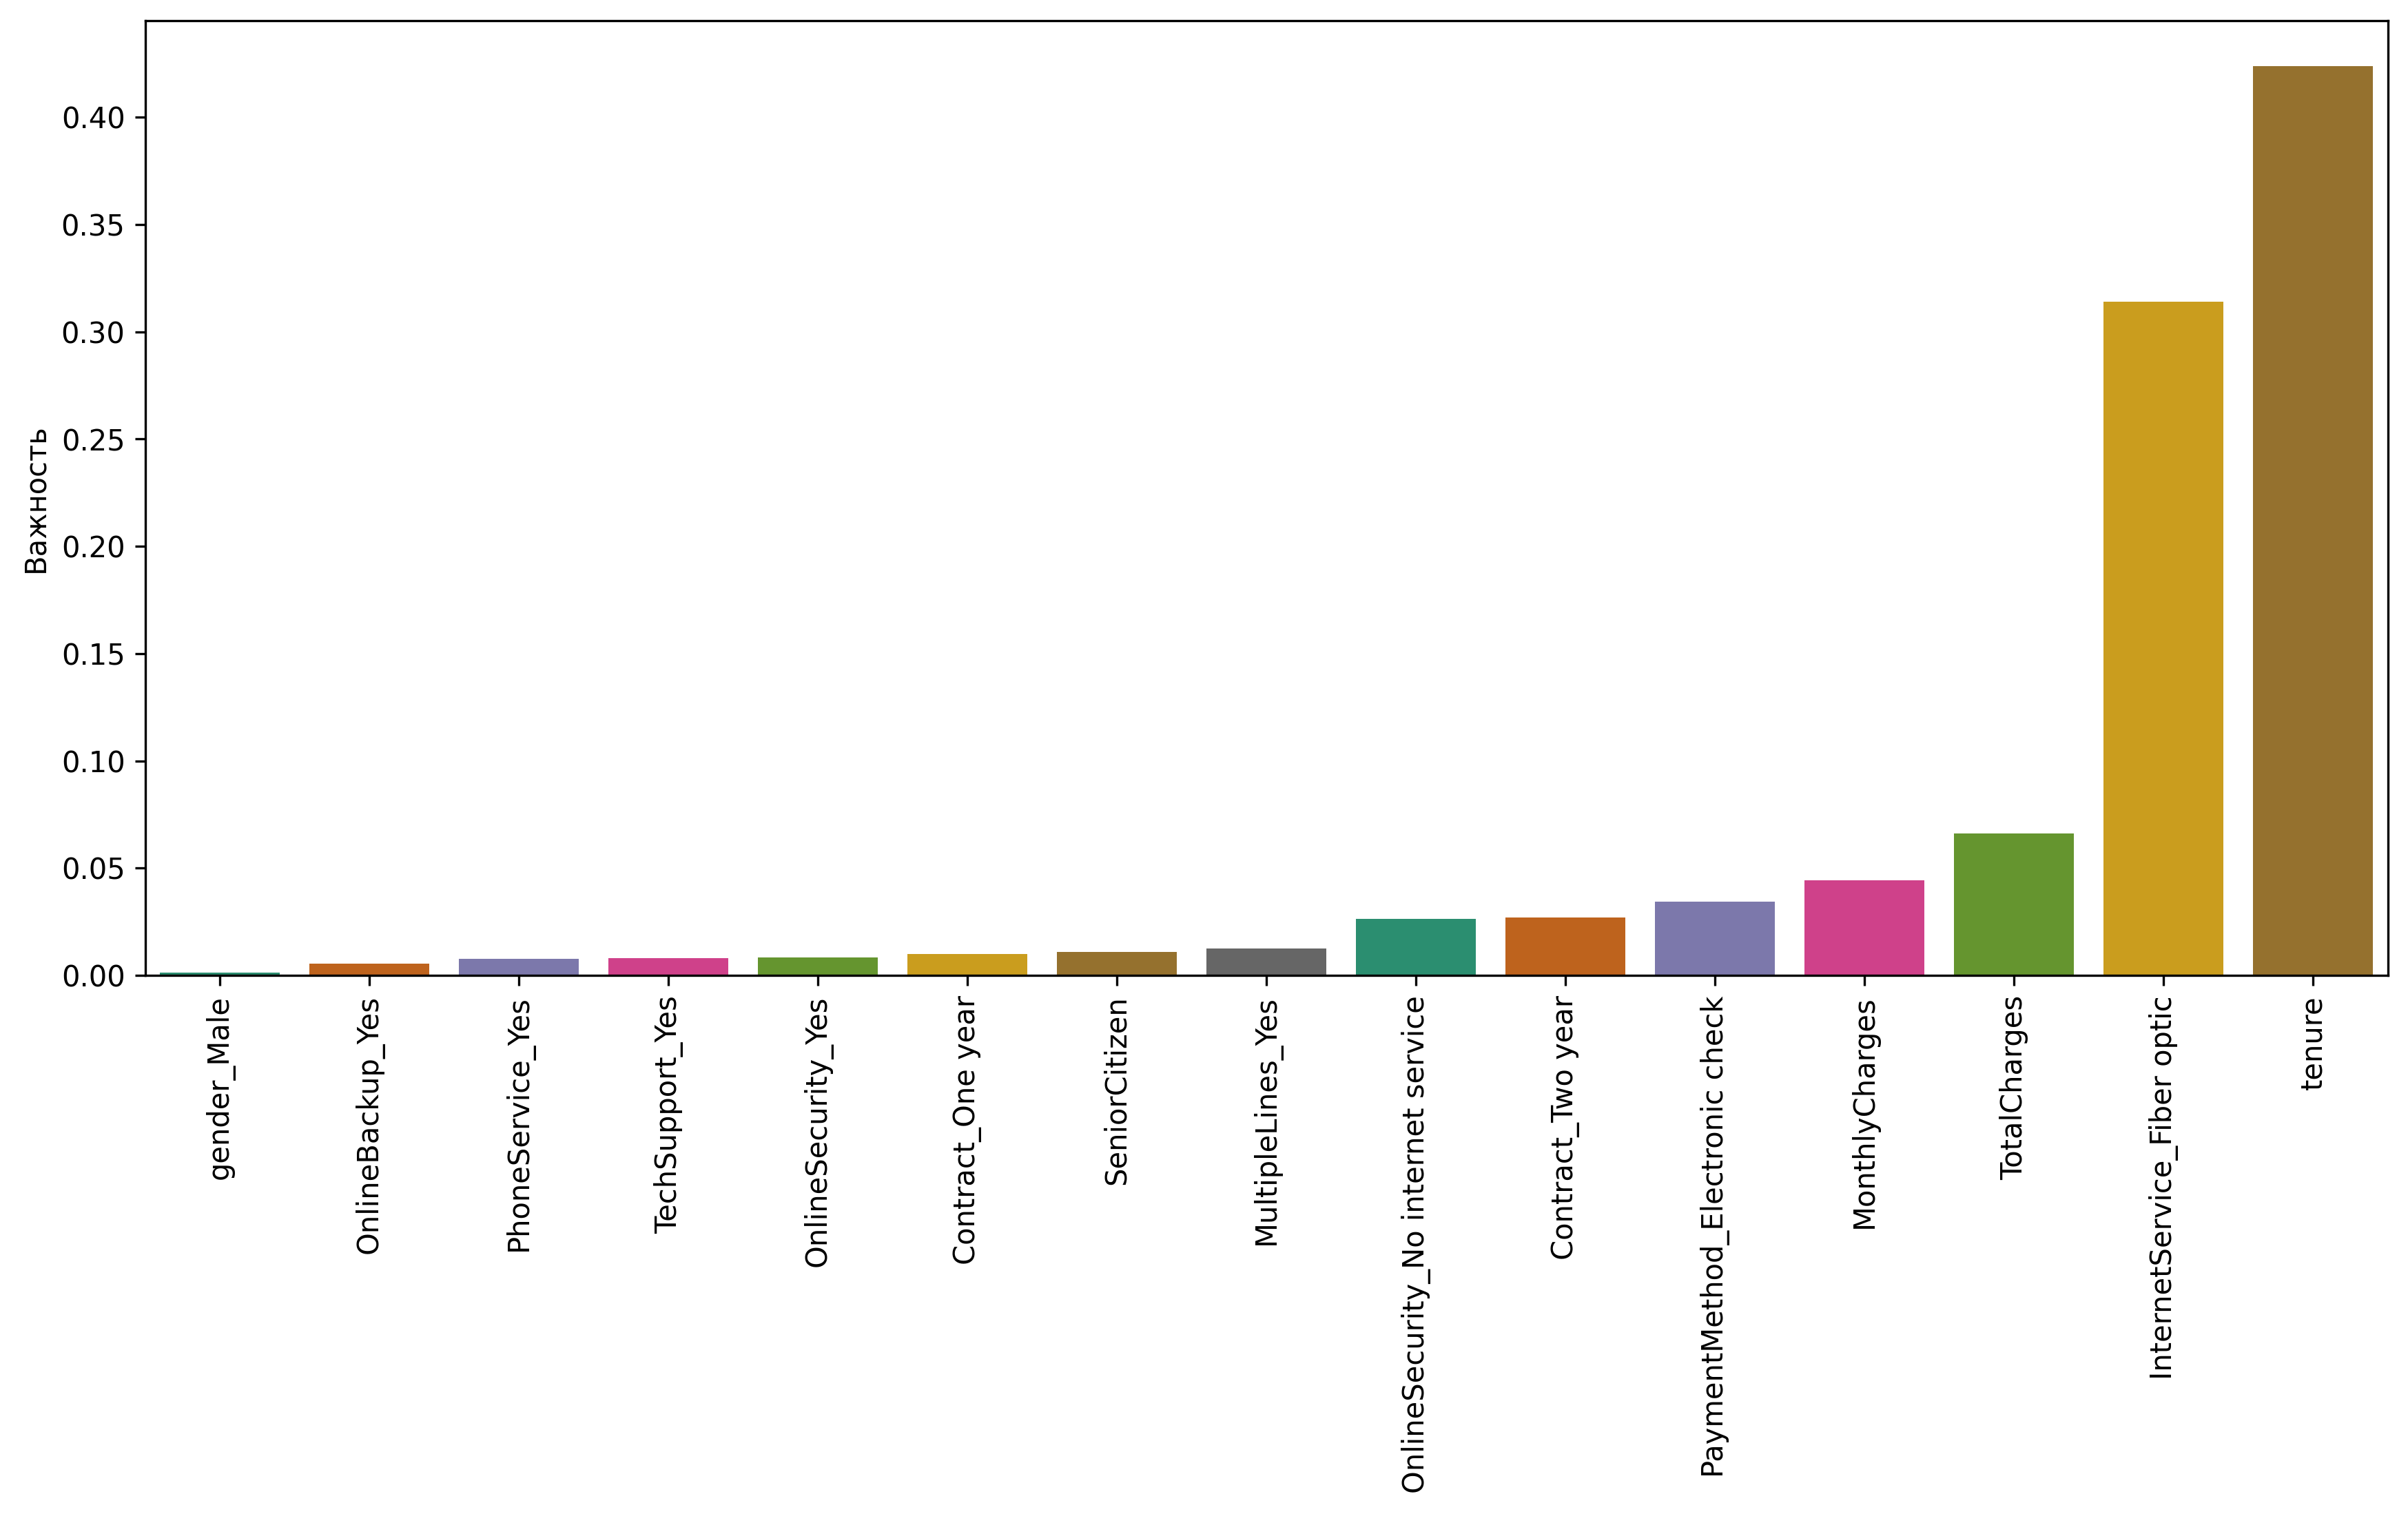

In [49]:
plt.figure(figsize=(14, 6), dpi=300)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Важность', palette="Dark2")
plt.xticks(rotation=90);

Ранее мы отметили, что признак tenure хорошо коррелирует с целевой переменной. Однако, существует ещё один интересный признак — Internetservice_Fiber optic, который не встречался в ходе предыдущего анализа. Теперь стоит выяснить, почему клиенты, нуждающиеся в оптоволоконном интернете, могут уходить в отток. Возможно, компания Telco предлагает более высокие цены на эту услугу по сравнению с конкурентами.

Далее создадим визуализацию дерева решений.

In [50]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'x[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606.0, 1722.0]'),
 Text(0.2375, 0.7857142857142857, 'x[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.36136363636363633, 0.8571428571428572, 'True  '),
 Text(0.1340909090909091, 0.6428571428571429, 'x[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'x[12] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'x[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'x[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'x[3] <= 43.65\ngini = 0.38\nsamples = 

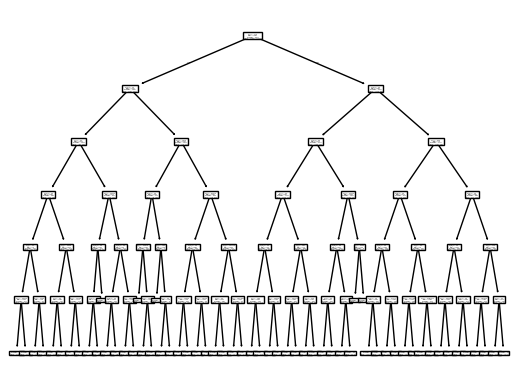

In [51]:
plot_tree(dt)

Дерево решений получилось достаточно громоздким. Для таких деревьев эта визуализация может быть избыточной при принятии бизнес-решений. Возможно, имеет смысл сосредоточиться только на самых первых узлах разбиения данных, чтобы выявить наиболее критичные признаки, по которым происходит разделение.

#### Случайный лес (Random Forest)
Теперь построим модель Random Forest, оценим её работу и проведём обучение.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(max_depth=6)


In [54]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6)

In [55]:
preds = rf.predict(X_test)


In [56]:
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

          No       0.86      0.93      0.90       557
         Yes       0.62      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



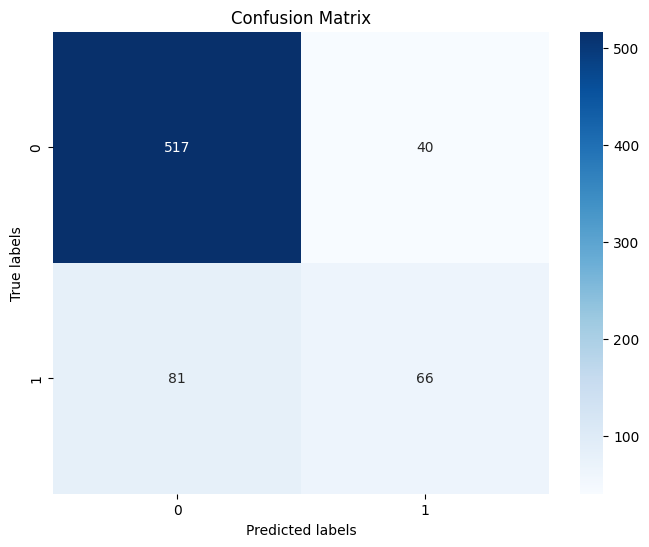

In [57]:
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Модель случайного леса работает немного хуже, чем модель "Decision Tree", что важно учитывать при сравнении метрик. Причина в том, что дерево решений оказалось слишком глубоким, что привело к переобучению (overfitting) — оно хорошо работает на обучающих данных, но хуже на тестовых. В таких случаях полезно ограничивать глубину дерева (max_depth).

В матрице ошибок (Confusion Matrix) наблюдаем интересную картину. Эта модель имеет более высокие метрики accuracy и precision при ограничении max_depth=6. Однако в нашей задаче мы стремимся минимизировать количество клиентов, которые фактически уходят в отток, но модель ошибочно предсказывает их остающимися. В матрице ошибок это значение составляет 80, в отличие от 75 для модели дерева решений. Эту ошибку контролирует метрика recall, которую нам нужно минимизировать. Следовательно, модель случайного леса имеет худшее значение метрики recall, чем дерево решений.

#### Расширяемые деревья (Boosted Trees)
Теперь создадим модели AdaBoost и Gradient Boosting, оценим их работу и проведём обучение.

In [58]:
from sklearn.ensemble import  AdaBoostClassifier


In [59]:
ada_model = AdaBoostClassifier(n_estimators=118)


In [60]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=118)

In [61]:
ada_preds = ada_model.predict(X_test)

In [62]:
print(classification_report(y_test, ada_preds))


              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.52      0.57       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [63]:
ada_model.feature_importances_

array([0.00847458, 0.16949153, 0.22033898, 0.43220339, 0.        ,
       0.        , 0.        , 0.01694915, 0.        , 0.01694915,
       0.02542373, 0.        , 0.        , 0.01694915, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00847458,
       0.        , 0.00847458, 0.00847458, 0.00847458, 0.00847458,
       0.01694915, 0.00847458, 0.        , 0.01694915, 0.00847458,
       0.        , 0.        , 0.        ])

In [64]:
ada_model.feature_importances_.argmax()

3

In [65]:
X.columns[3]

'TotalCharges'

В модели AdaBoost наиболее важным признаком оказался TotalCharges. Это логично, поскольку он показывает общие расходы клиента в кампании Telco, и этот признак также хорошо коррелирует с целевой переменной Churn.

Теперь приступим к оптимизации модели.

In [66]:
from sklearn.metrics import accuracy_score

error_rates = []

for n in range(1, 120):
    best_ada_model = AdaBoostClassifier(n_estimators=n)
    best_ada_model.fit(X_train, y_train)
    best_ada_preds = best_ada_model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, best_ada_preds)
    
    error_rates.append(err)

При увеличении количества деревьев ошибка модели должна уменьшатся

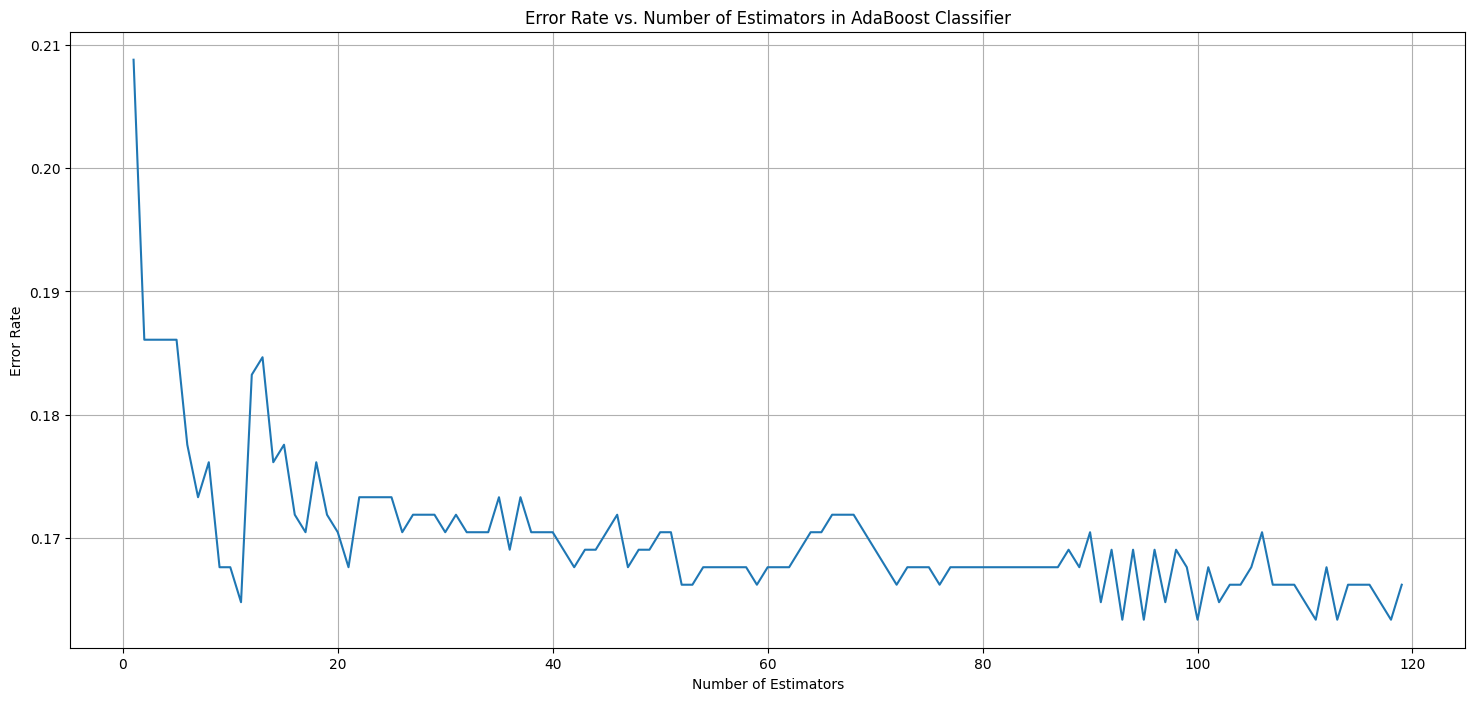

In [67]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 120), error_rates)
plt.title('Error Rate vs. Number of Estimators in AdaBoost Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show();

На графике оптимальное значение ошибки находится примерно в районе 118. Это значение мы и использовали при обучении модели выше

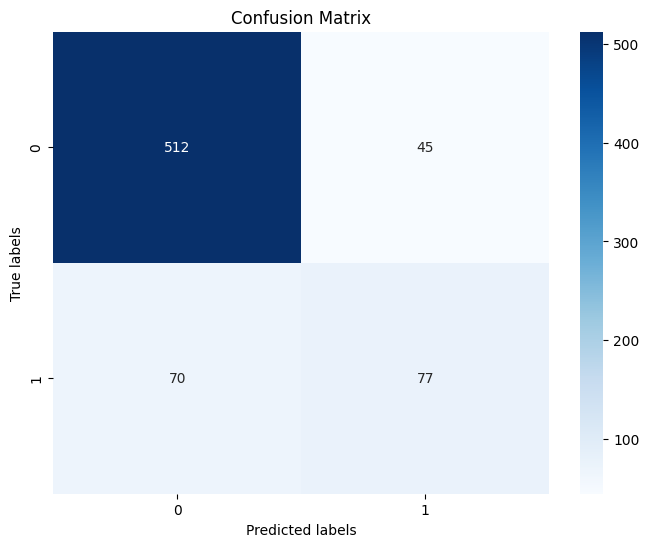

In [69]:
conf_matrix = confusion_matrix(y_test, ada_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Мы уменьшили значение метрики recall. И это значение равно 70.

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130],
              'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'max_depth': [3, 4, 5, 6, 7, 8, 9]}

In [72]:
gb_model = GradientBoostingClassifier()

In [73]:
grid = GridSearchCV(estimator=gb_model, param_grid=param_grid)

In [75]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130]})

In [76]:
gb_preds = grid.predict(X_test)

In [77]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=80)

In [78]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}

In [79]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.59      0.51      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.81      0.82      0.82       704



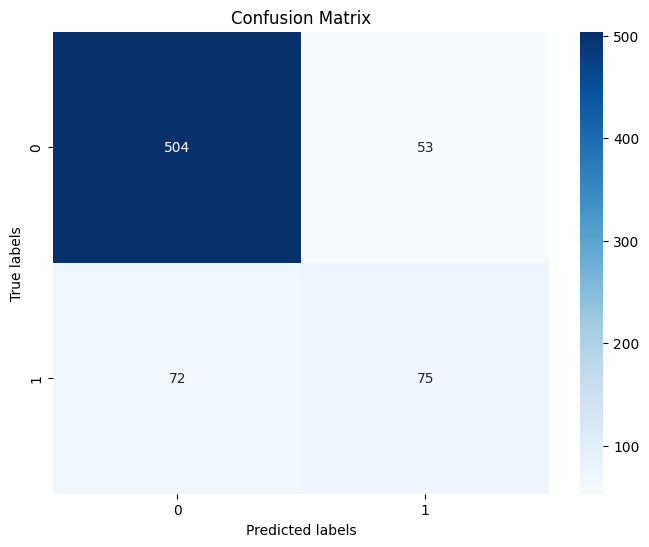

In [80]:
conf_matrix = confusion_matrix(y_test, gb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Подводя итоги, можно отметить, что модель AdaBoost с оптимизированными гиперпараметрами показывает немного худшие результаты по сравнению с моделями на основе расширяемых деревьев.

#### Логистическая регрессия
Теперь создадим модель логистической регрессии

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [82]:
scaler = StandardScaler()

In [83]:
scaled_X_train = scaler.fit_transform(X_train)

In [84]:
scaleed_X_test = scaler.transform(X_test)

In [85]:
log_model = LogisticRegressionCV()

In [86]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

оптимальные значения логистической регрессии

In [87]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [88]:
log_model.C_

array([0.04641589])

In [89]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

коэффициенты модели

In [90]:
log_model.coef_

array([[ 8.50978351e-02, -7.35111542e-01,  1.29221171e-01,
        -1.56351333e-02,  4.79987953e-04, -1.50747632e-02,
        -4.43580136e-02, -8.03040647e-02,  8.03040647e-02,
         1.30196342e-01,  3.91037246e-01, -4.17105411e-02,
        -4.17105411e-02, -1.79349219e-01, -4.17105411e-02,
        -6.87981541e-02, -4.17105411e-02, -4.86559668e-04,
        -4.17105411e-02, -1.56171995e-01, -4.17105411e-02,
         1.17666197e-01, -4.17105411e-02,  9.53287254e-02,
        -2.96495051e-01, -5.95550305e-01,  1.66288540e-01,
        -4.32903180e-02,  1.47591543e-01, -2.23400002e-02,
        -1.67639596e-01, -1.51422564e-01, -1.83869135e-02]])

In [91]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0]).sort_values()
coefs

tenure                                  -0.735112
Contract_Two year                       -0.595550
Contract_One year                       -0.296495
OnlineSecurity_Yes                      -0.179349
Tenure Cohort_12-24 месяцев             -0.167640
TechSupport_Yes                         -0.156172
Tenure Cohort_24-48 месяцев             -0.151423
PhoneService_Yes                        -0.080304
OnlineBackup_Yes                        -0.068798
Dependents_Yes                          -0.044358
PaymentMethod_Credit card (automatic)   -0.043290
DeviceProtection_No internet service    -0.041711
OnlineBackup_No internet service        -0.041711
StreamingMovies_No internet service     -0.041711
InternetService_No                      -0.041711
StreamingTV_No internet service         -0.041711
OnlineSecurity_No internet service      -0.041711
TechSupport_No internet service         -0.041711
PaymentMethod_Mailed check              -0.022340
Tenure Cohort_Более 48 месяцев          -0.018387


In [92]:
y_pred = log_model.predict(scaleed_X_test)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.61      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



#### ROC Curve

In [94]:
from sklearn.metrics import roc_curve, RocCurveDisplay

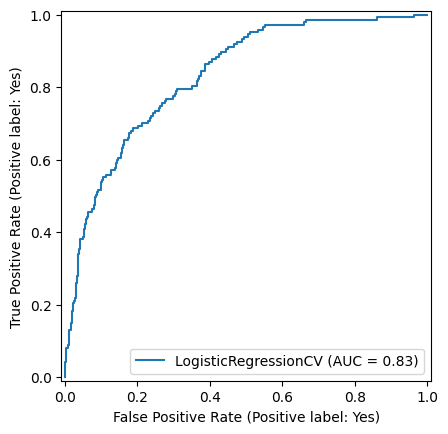

In [95]:
RocCurveDisplay.from_estimator(log_model, scaleed_X_test, y_test);

LogisticRegressionCV (AUC=0.83) указывает на то, что для модели логистической регрессии была использована кросс-валидация, а значение площади под кривой ROC (AUC) составило 0.83. AUC служит метрикой для оценки качества классификации: чем ближе значение к 1, тем точнее модель. Значение AUC=0.83 свидетельствует о хорошем качестве данной модели логистической регрессии.

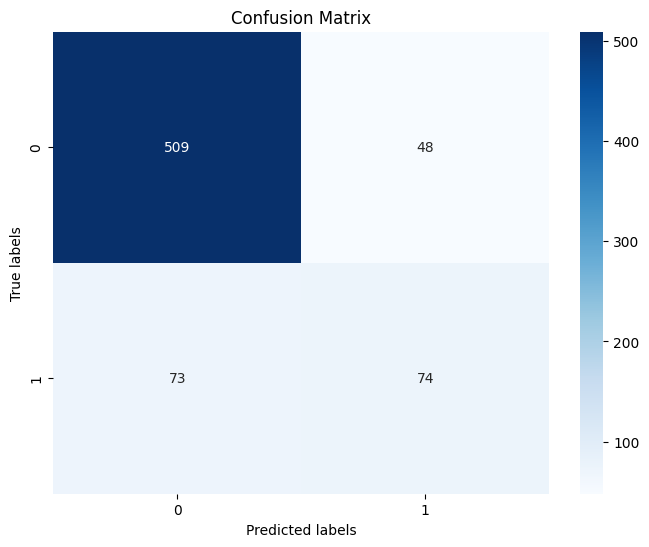

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Логистическая регрессия показывает немного худшие результаты по сравнению с моделью AdaBoost. Метрика recall составляет 73, тогда как ранее лучшее значение, которое мы достигали, было 70.

#### Метод опорных векторов(SVM)

In [97]:
from sklearn.svm import SVC

In [98]:
svc = SVC(class_weight='balanced')

In [99]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1]}

In [100]:
grid = GridSearchCV(svc, param_grid)

In [101]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [102]:
grid.best_params_

{'C': 1}

In [103]:
grid_preds = grid.predict(scaleed_X_test)

In [104]:
confusion_matrix(y_test, grid_preds)

array([[410, 147],
       [ 37, 110]], dtype=int64)

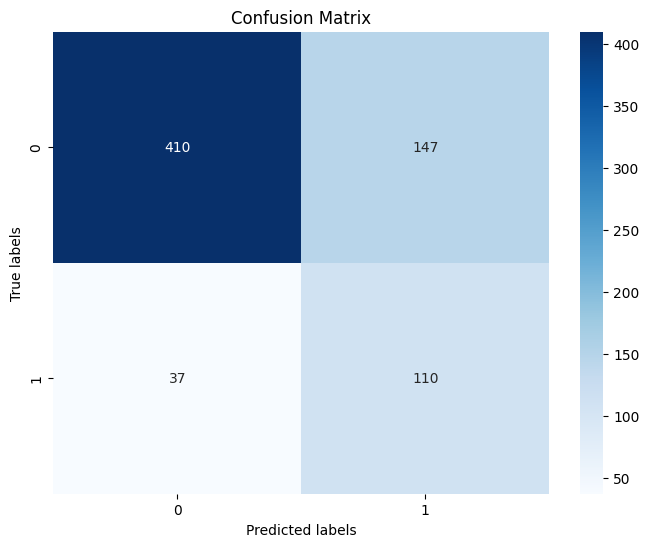

In [105]:
conf_matrix = confusion_matrix(y_test, grid_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [106]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

          No       0.92      0.74      0.82       557
         Yes       0.43      0.75      0.54       147

    accuracy                           0.74       704
   macro avg       0.67      0.74      0.68       704
weighted avg       0.82      0.74      0.76       704



Мы достигли наилучшего значения метрики recall, равного 37, что позволило сократить ошибку предсказания для этой метрики почти вдвое по сравнению с предыдущими моделями.

#### Метод К-ближайших соседей(KNN)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier()

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
operations = [('scaler', scaler), ('knn', knn)]

In [111]:
pipe = Pipeline(operations)

In [112]:
k_values = list(range(1, 30))

In [113]:
param_grid = {'knn__n_neighbors': k_values}

In [114]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [115]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [116]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=28))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=28),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 28,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [117]:
pd.DataFrame(full_cv_classifier.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.012310      0.000751         0.087428        0.064629  \
1       0.012903      0.001494         0.053805        0.003963   
2       0.012800      0.001166         0.051967        0.004411   
3       0.012200      0.001167         0.054000        0.002827   
4       0.012799      0.001600         0.056712        0.004236   

   param_knn__n_neighbors                   params  split0_test_score   
0                       1  {'knn__n_neighbors': 1}           0.729068  \
1                       2  {'knn__n_neighbors': 2}           0.755924   
2                       3  {'knn__n_neighbors': 3}           0.761453   
3                       4  {'knn__n_neighbors': 4}           0.782780   
4                       5  {'knn__n_neighbors': 5}           0.771722   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score   
0           0.728278           0.703002           0.715415           0.713043  \
1           0.757504           0.746445           0.746245           0.762846   
2           0.750395           0.729068           0.760474           0.762055   
3           0.770142           0.748815           0.760474           0.769960   
4           0.753555           0.754344           0.756522           0.762846   

   mean_test_score  std_test_score  rank_test_score  
0         0.717761        0.009839               29  
1         0.753793        0.006500               27  
2         0.752689        0.012557               28  
3         0.766435        0.011308               24  
4         0.759798        0.006796               26

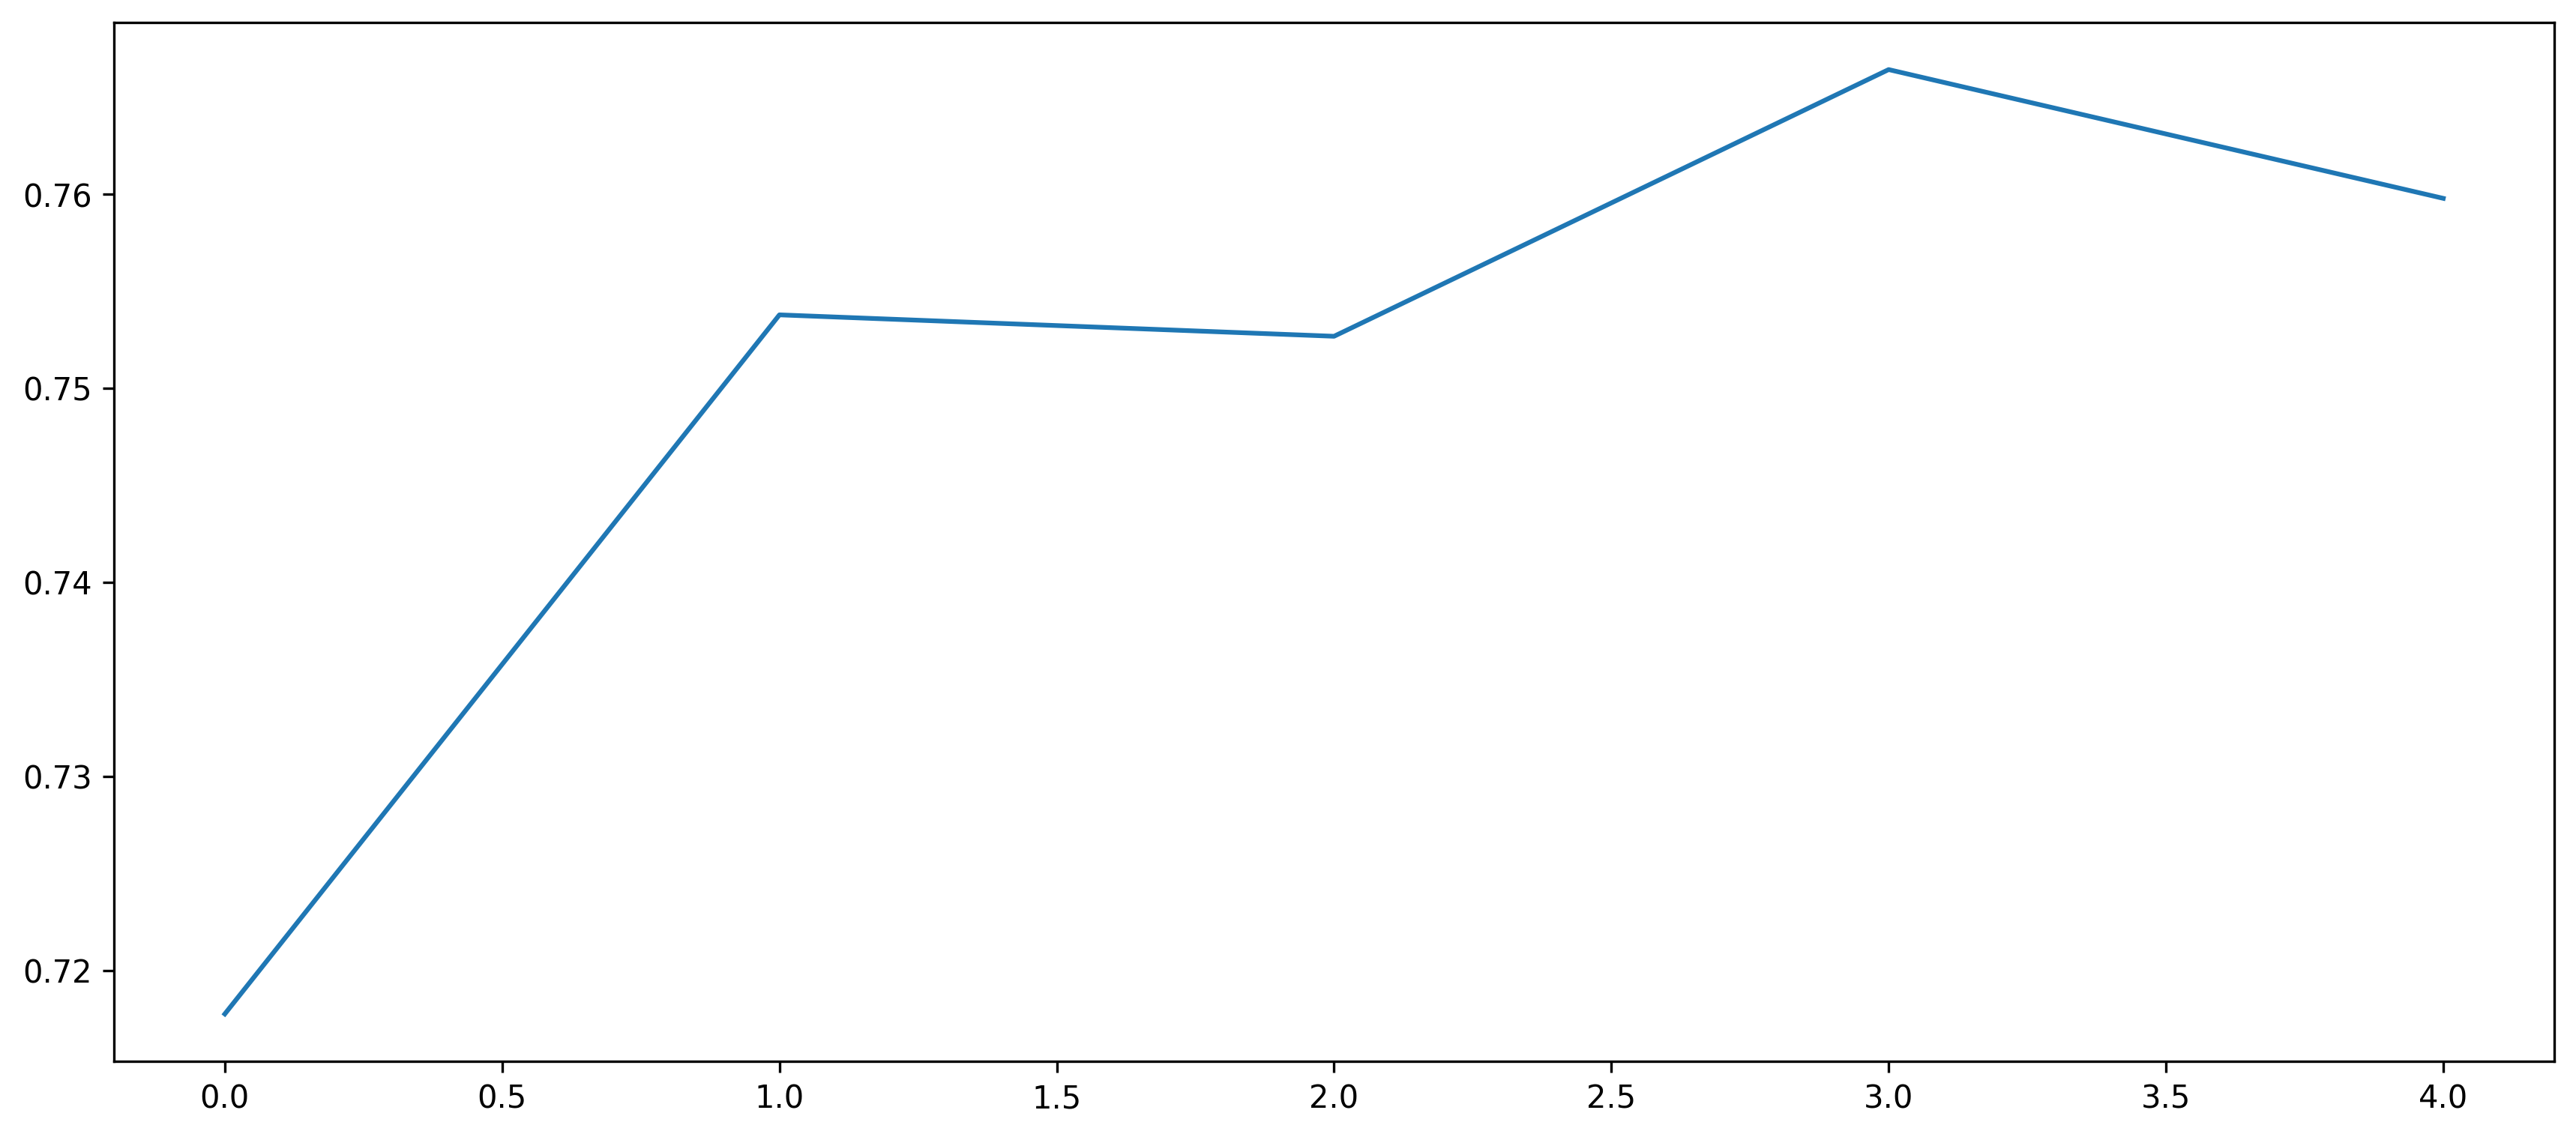

In [118]:
plt.figure(figsize=(14, 6), dpi=300)
pd.DataFrame(full_cv_classifier.cv_results_).head()['mean_test_score'].plot();

In [119]:
knn_pred = full_cv_classifier.predict(X_test)

In [120]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.70       704
weighted avg       0.80      0.81      0.81       704



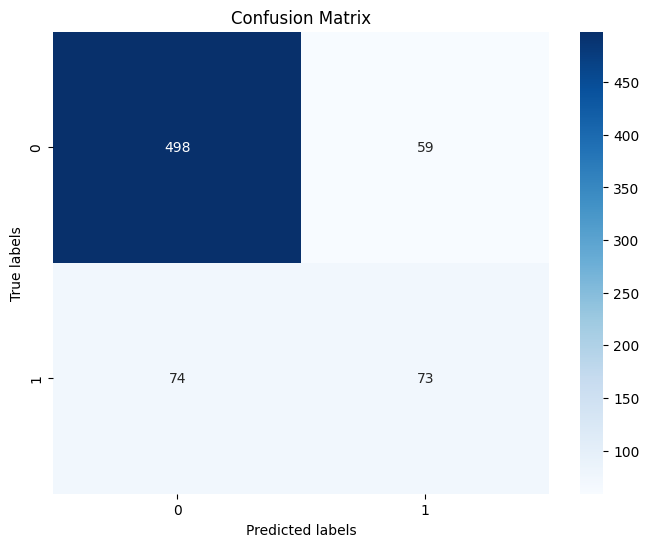

In [121]:
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

Значение recall оказалось достаточно высоким, однако оно уступает многим моделям, рассмотренным ранее.

Анализ показал, что показатель TotalCharges (общие расходы) оказывает наибольшее влияние на отток клиентов, а основной отток наблюдается на краткосрочных контрактах. В связи с этим кампании Telco рекомендуется пересмотреть условия краткосрочных контрактов (менее года), чтобы удержать абонентов. Следует разработать меры, направленные на удовлетворение потребностей клиентов с такими контрактами.

Наилучшей моделью для предсказания в данном случае оказался метод опорных векторов (SVM). Модель, предсказывающая вероятность оттока клиентов, готова к внедрению в продакшн.

Одним из возможных способов развертывания является использование файла с расширением .pickle

In [122]:
import pickle

In [123]:
svc = SVC(class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1]}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)
# Сохранение модели в файл
with open('model.pickle', 'wb') as file:
    pickle.dump(grid, file)

вот это можно сделать для загрузки модели в будущем

In [ ]:
with open('model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)
# Теперь можно использовать загруженную модель для предсказаний
grid_preds = loaded_model.predict(scaleed_X_test)